In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Files into Python**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
#importing data
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project_churn_prediction/churn_prediction.csv')

In [ ]:
#first 5 instances using "head()" function
data.head(100)

customer_id  vintage  age  gender  dependents     occupation    city  \
0             1     2101   66    Male         0.0  self_employed   187.0   
1             2     2348   35    Male         0.0  self_employed     NaN   
2             4     2194   31    Male         0.0       salaried   146.0   
3             5     2329   90     NaN         NaN  self_employed  1020.0   
4             6     1579   42    Male         2.0  self_employed  1494.0   
..          ...      ...  ...     ...         ...            ...     ...   
95           99     1978   26    Male         0.0  self_employed   318.0   
96          100     2158   32  Female         0.0  self_employed  1477.0   
97          101     1971   71    Male         0.0        retired   800.0   
98          102     2304   56  Female         0.0  self_employed  1534.0   
99          103     2094   43    Male         3.0  self_employed   834.0   

    customer_nw_category  branch_code  current_balance  ...  \
0                      2          755          1458.71  ...   
1                      2         3214          5390.37  ...   
2                      2           41          3913.16  ...   
3                      2          582          2291.91  ...   
4                      3          388           927.72  ...   
..                   ...          ...              ...  ...   
95                     3           35          1454.24  ...   
96                     3         2903          2429.18  ...   
97                     3          112          2460.94  ...   
98                     2           63         22437.57  ...   
99                     2         1355         10152.97  ...   

    average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                         1458.71                         1449.07   
1                         7799.26                        12419.41   
2                         4910.17                         2815.94   
3                         2084.54                         1006.54   
4                         1643.31                         1871.12   
..                            ...                             ...   
95                        1440.99                         1260.99   
96                        3826.64                         4367.47   
97                        2460.94                         2445.36   
98                       14741.84                         7979.38   
99                        3216.92                         3063.66   

    current_month_credit  previous_month_credit  current_month_debit  \
0                   0.20                   0.20                 0.20   
1                   0.56                   0.56              5486.27   
2                   0.61                   0.61              6046.73   
3                   0.47                   0.47                 0.47   
4                   0.33                 714.61               588.62   
..                   ...                    ...                  ...   
95                  0.34                1085.49              2877.35   
96                  0.14                   0.14              1428.71   
97                  0.29                   0.29                 0.29   
98                  0.39               14643.24               192.23   
99              11928.66               22783.16              3474.96   

    previous_month_debit  current_month_balance  previous_month_balance  \
0                   0.20                1458.71                 1458.71   
1                 100.56                6496.78                 8787.61   
2                 259.23                5006.28                 5070.14   
3                2143.33                2291.91                 1669.79   
4                1538.06                1157.15                 1677.16   
..                   ...                    ...                     ...   
95                410.67                2173.64                 1634.38   
96                114.43                

In [ ]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(28382, 21)

In [ ]:
#Printing all the columns present in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

# **[1] Exploratory Data Analysis**

## **[1.1] Variable Identification and Typecasting**




In [ ]:
# A closer look at the data types present in the data
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### [1.1.1] Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [ ]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### [1.1.2] Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [ ]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

### [1.1.3] Object Data Type

In [ ]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

*    **variables like 'gender', 'occupation' and 'last_transaction' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [ ]:
# Manually checking object types
data[['gender','occupation','last_transaction']].head(7)

gender     occupation last_transaction
0    Male  self_employed       2019-05-21
1    Male  self_employed       2019-11-01
2    Male       salaried              NaT
3     NaN  self_employed       2019-08-06
4    Male  self_employed       2019-11-03
5  Female  self_employed       2019-11-01
6    Male        retired       2019-09-24

*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [ ]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

## **[1.2] Data Engineering**

###[1.2.1] Extracting new columns from "last_transaction"

In [ ]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [ ]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [ ]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

last_transaction  doy_ls_tran  woy_ls_tran  moy_ls_tran  dow_ls_tran
0       2019-05-21        141.0         21.0          5.0          1.0
1       2019-11-01        305.0         44.0         11.0          4.0
2              NaT          NaN          NaN          NaN          NaN
3       2019-08-06        218.0         32.0          8.0          1.0
4       2019-11-03        307.0         44.0         11.0          6.0

The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

## **[1.3] Univariate: Missing Values**

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

**Things to investigate further down:**
*    Gender:
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

## **[1.4] Univariate Analysis: Outliers**

In [ ]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### [1.4.1] customer_details

True
True
True


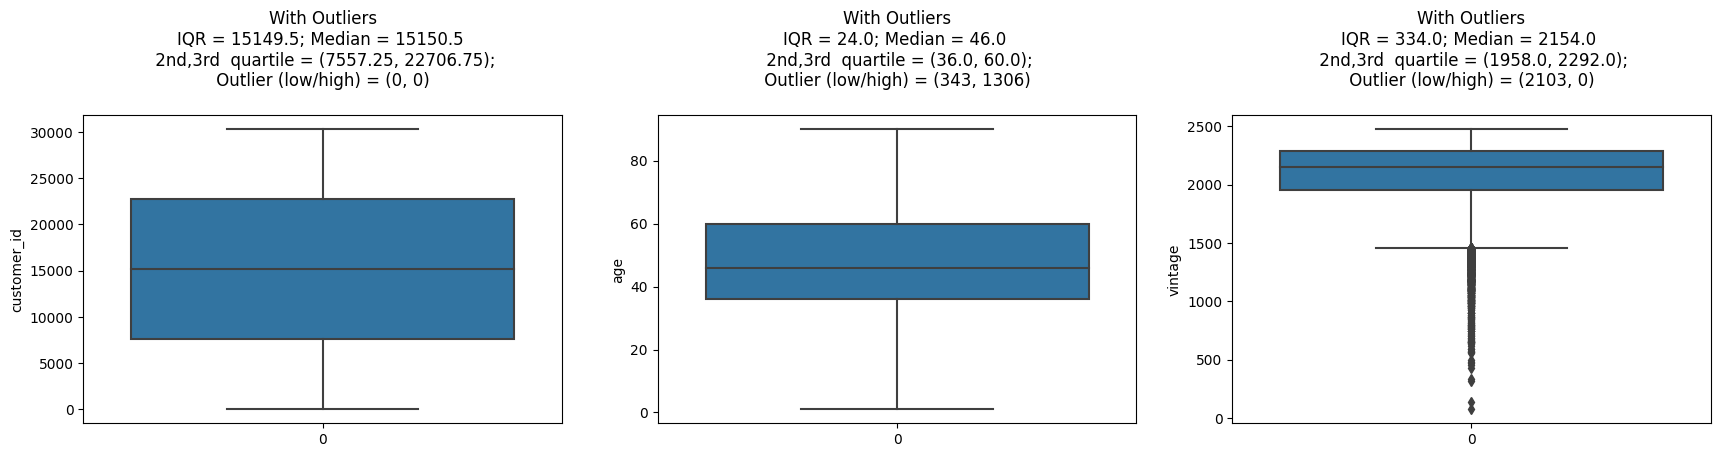

In [ ]:
UVA_outlier(data, customer_details)

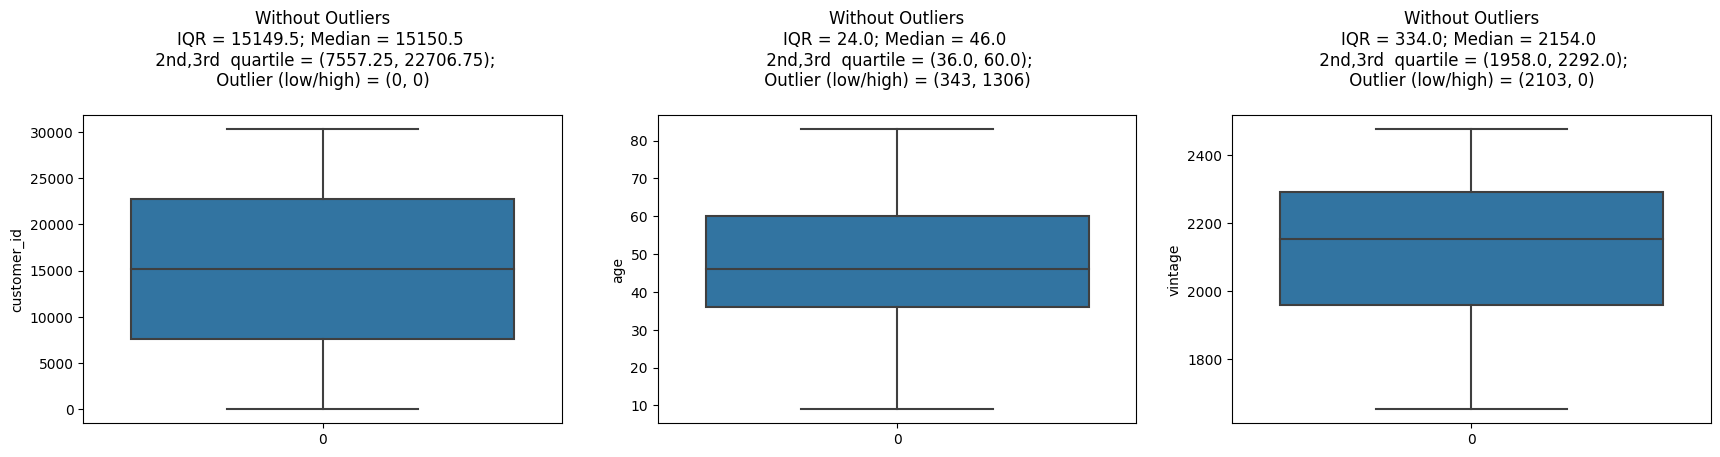

In [ ]:
UVA_outlier(data, customer_details, include_outlier=False)

### [1.4.2] current_month

True
True
True
True


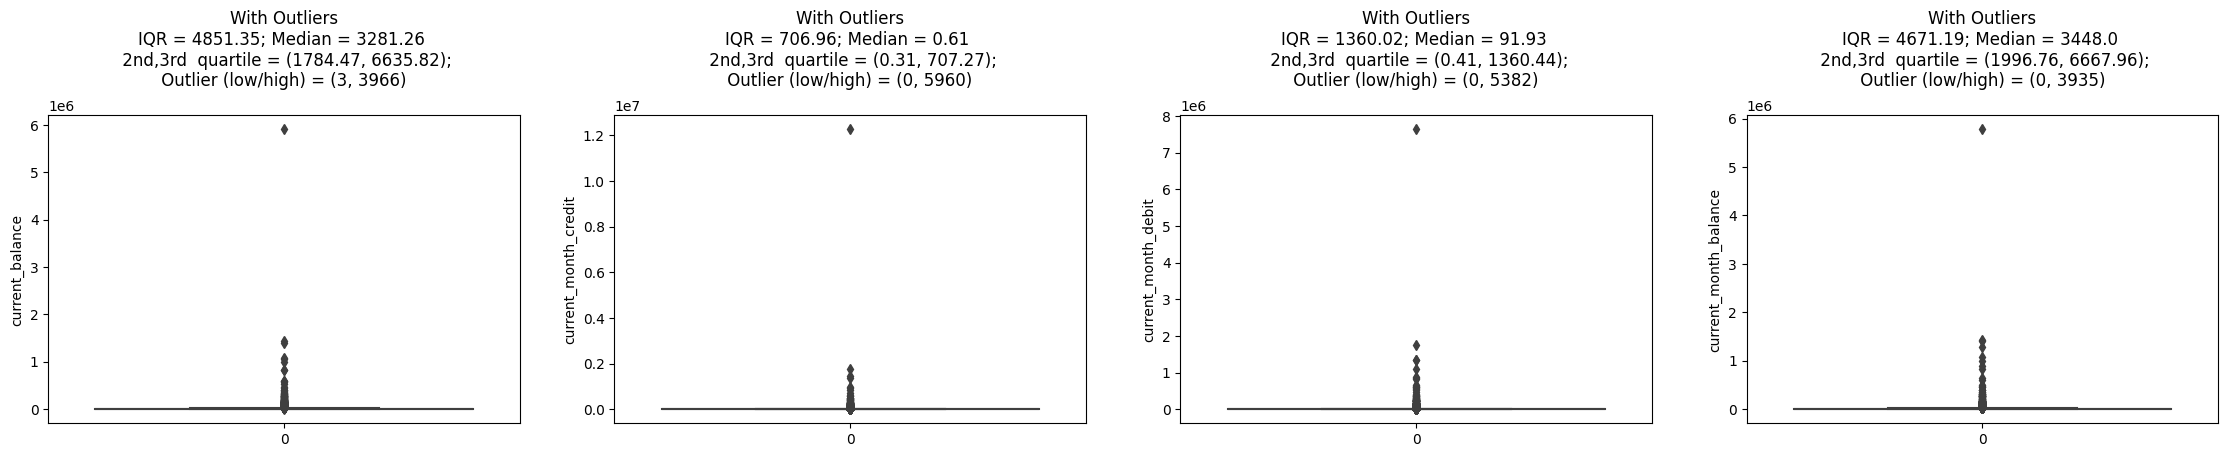

In [ ]:
UVA_outlier(data, current_month,)

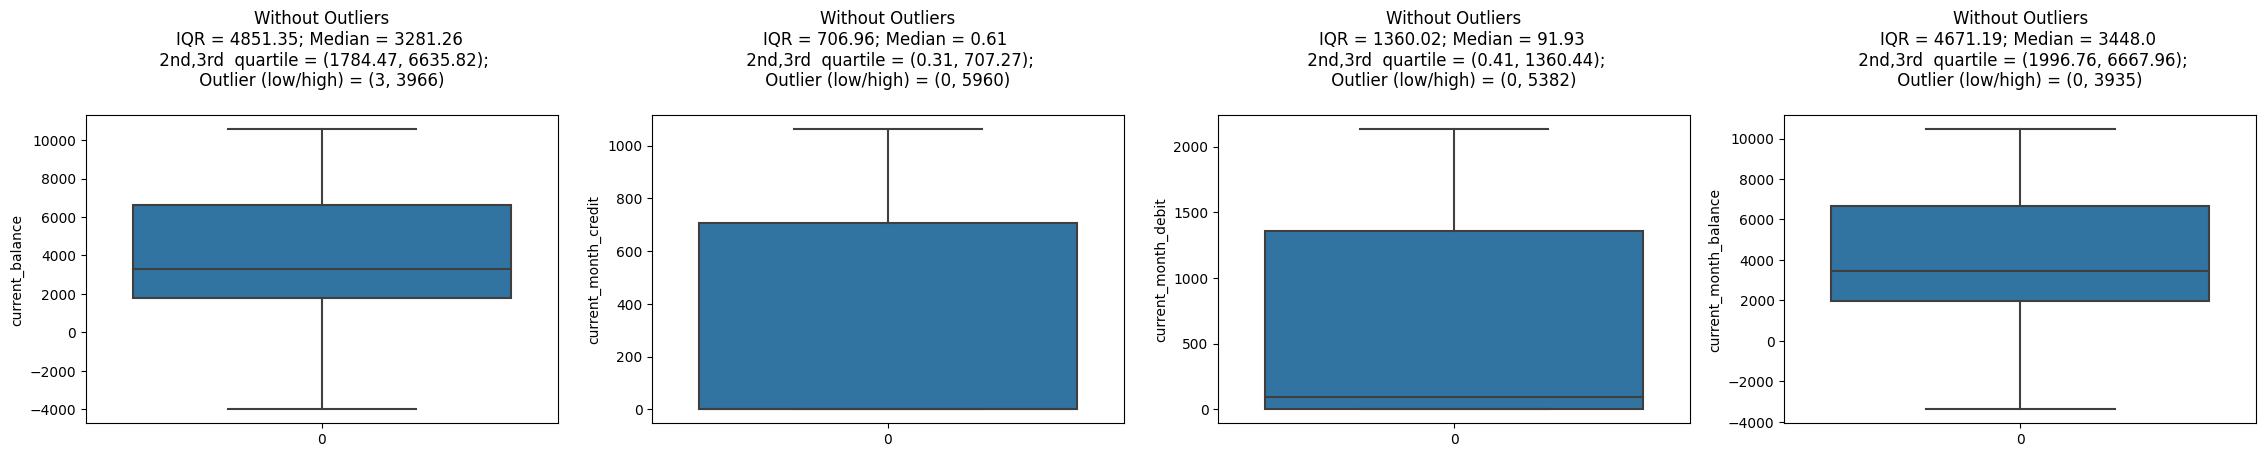

In [ ]:
UVA_outlier(data, current_month, include_outlier=False)

### [1.4.3] previous_month

True
True
True
True


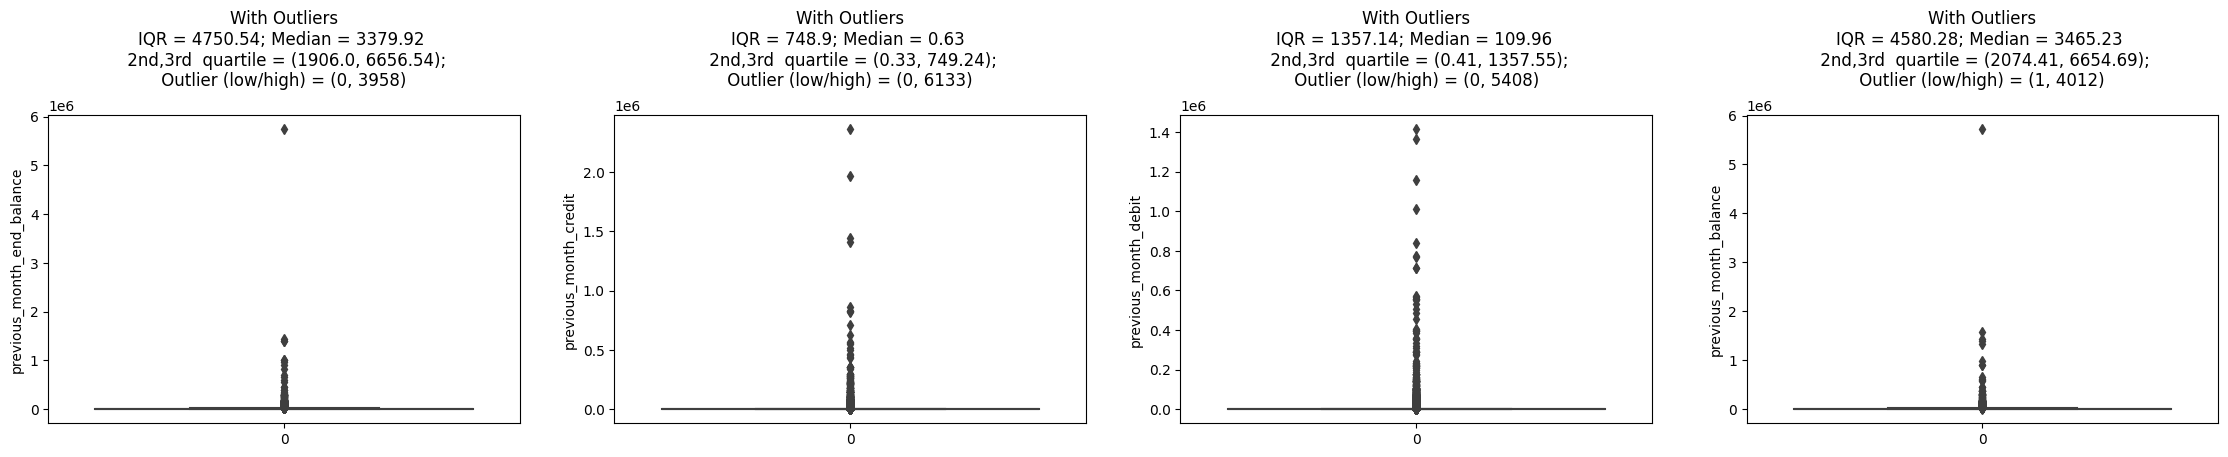

In [ ]:
UVA_outlier(data, previous_month)

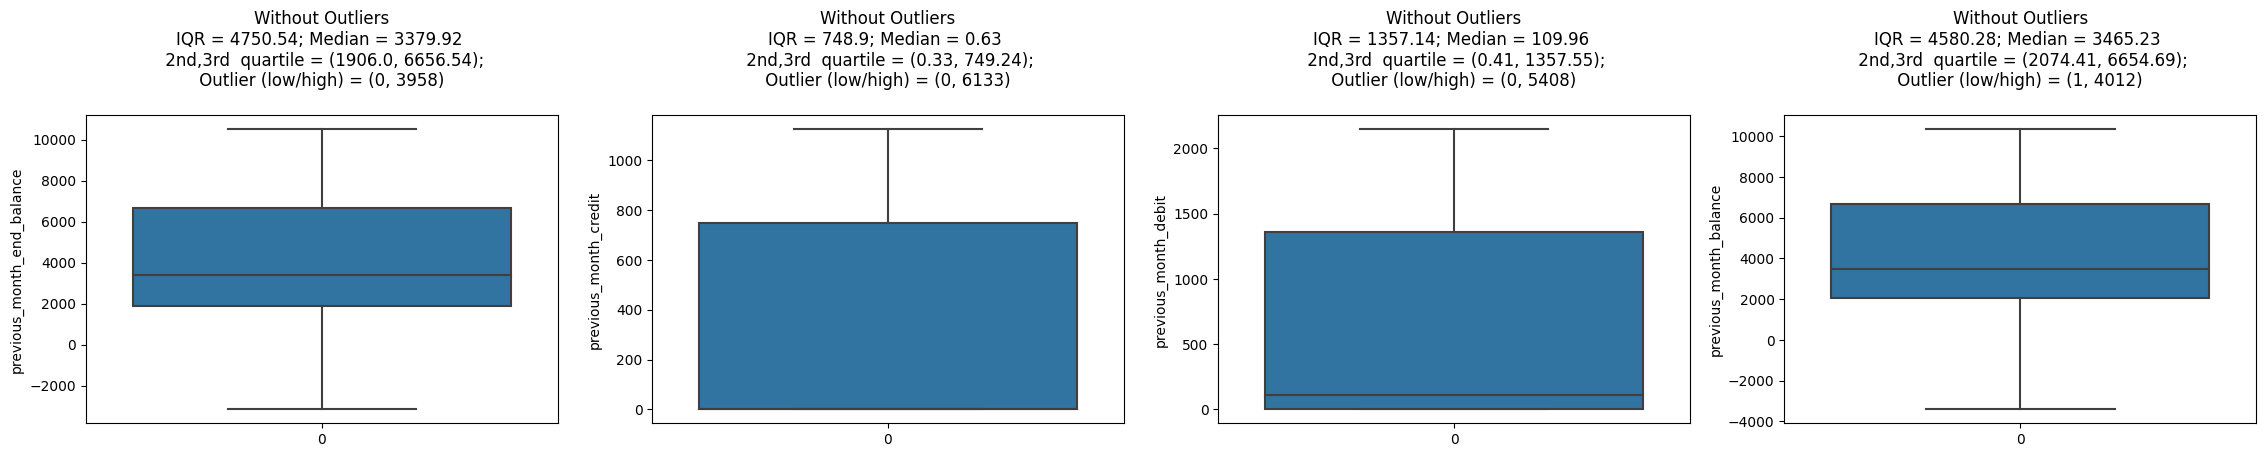

In [ ]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### [1.4.4] previous quarters

True
True


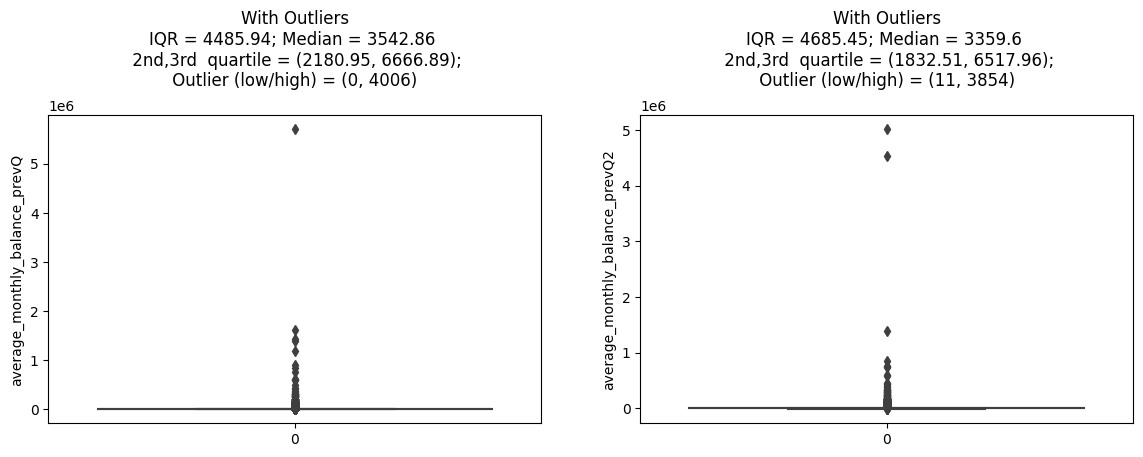

In [ ]:
UVA_outlier(data,previous_quarters)

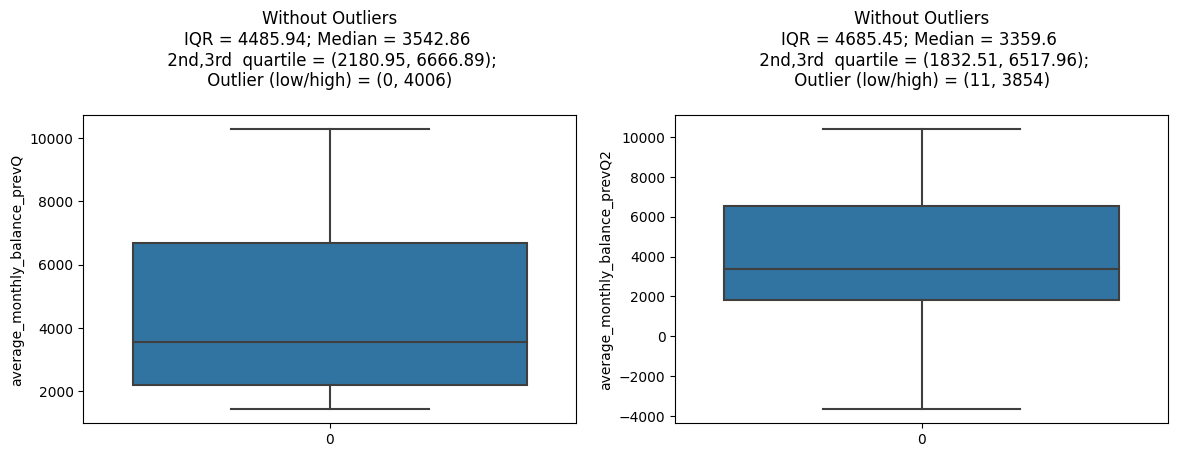

In [ ]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

### [1.4.5] transaction_date

True
True
True
True


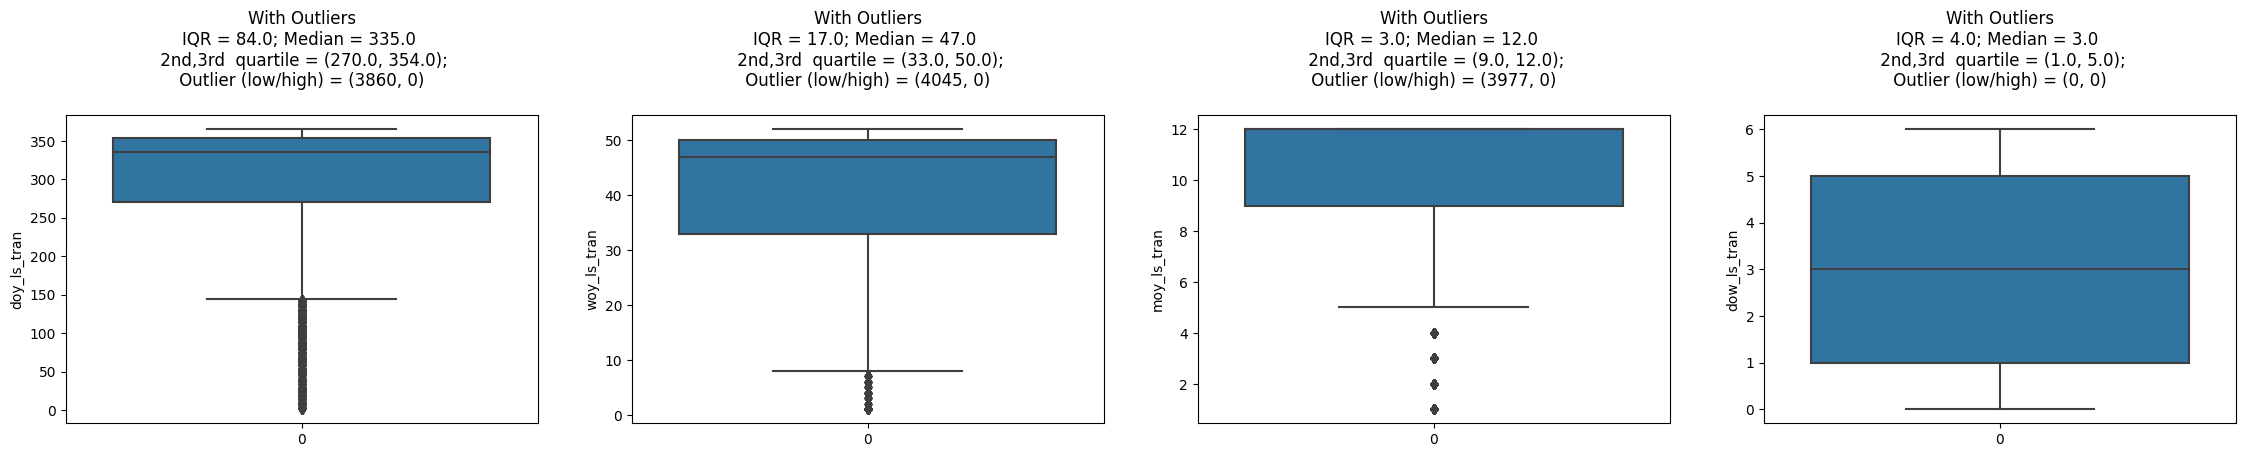

In [ ]:
UVA_outlier(data,transaction_date)

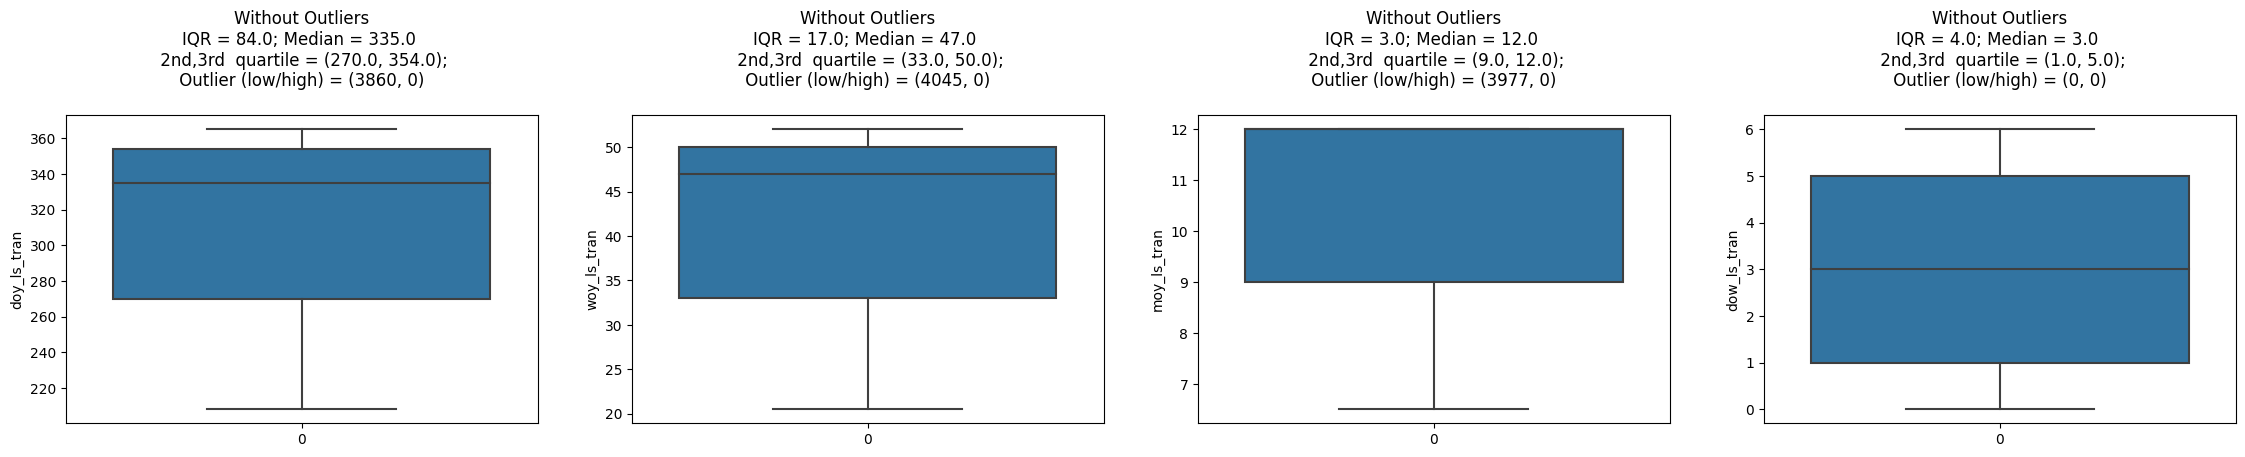

In [ ]:
UVA_outlier(data, transaction_date, include_outlier = False)

## **[1.5] Outlier treatment**

In [ ]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [ ]:
# replacing outliers with whisker values
for i in numerical:

    quant25 = numerical[i].quantile(0.25)
    quant75 = numerical[i].quantile(0.75)
    IQR = quant75 - quant25
    med = numerical[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)


    numerical[i][numerical[i]>whis_high] = whis_high+1
    numerical[i][numerical[i]<whis_low] = whis_low-1

##**[1.6] Univariate Analysis: Numerical Variables**

In [ ]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def KDE_UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y =  [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### [1.6.1] customer_information

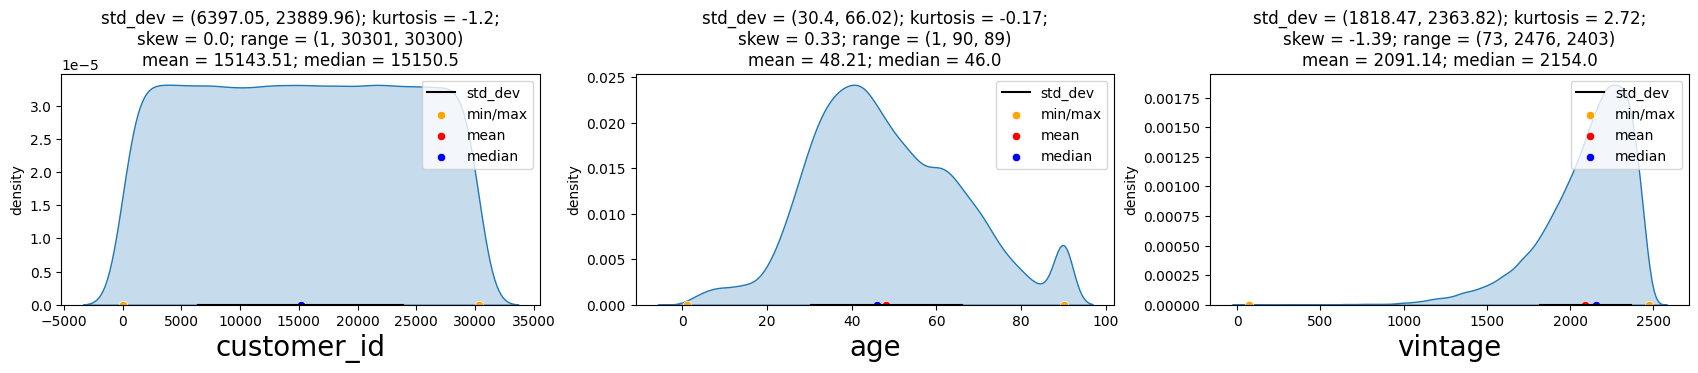

In [ ]:
KDE_UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### [1.6.2] current_month

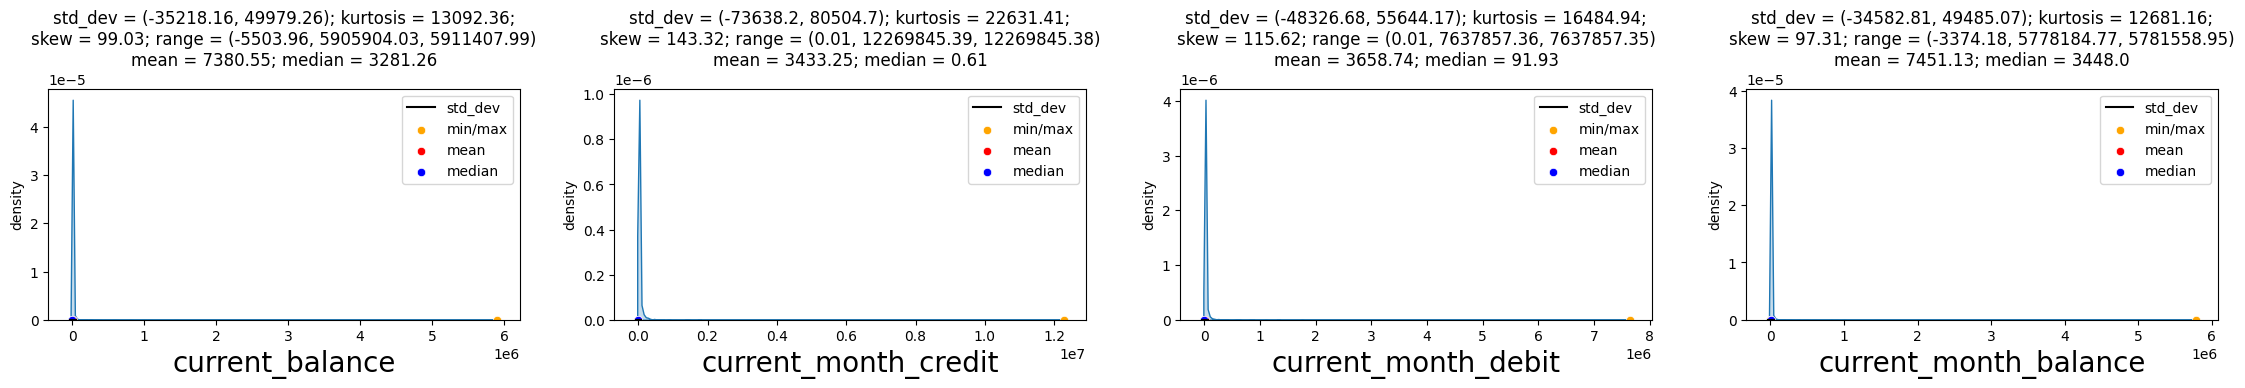

In [ ]:
KDE_UVA_numeric(data,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are obvious.


**Need to Remove Outliers to visulaise these plots**

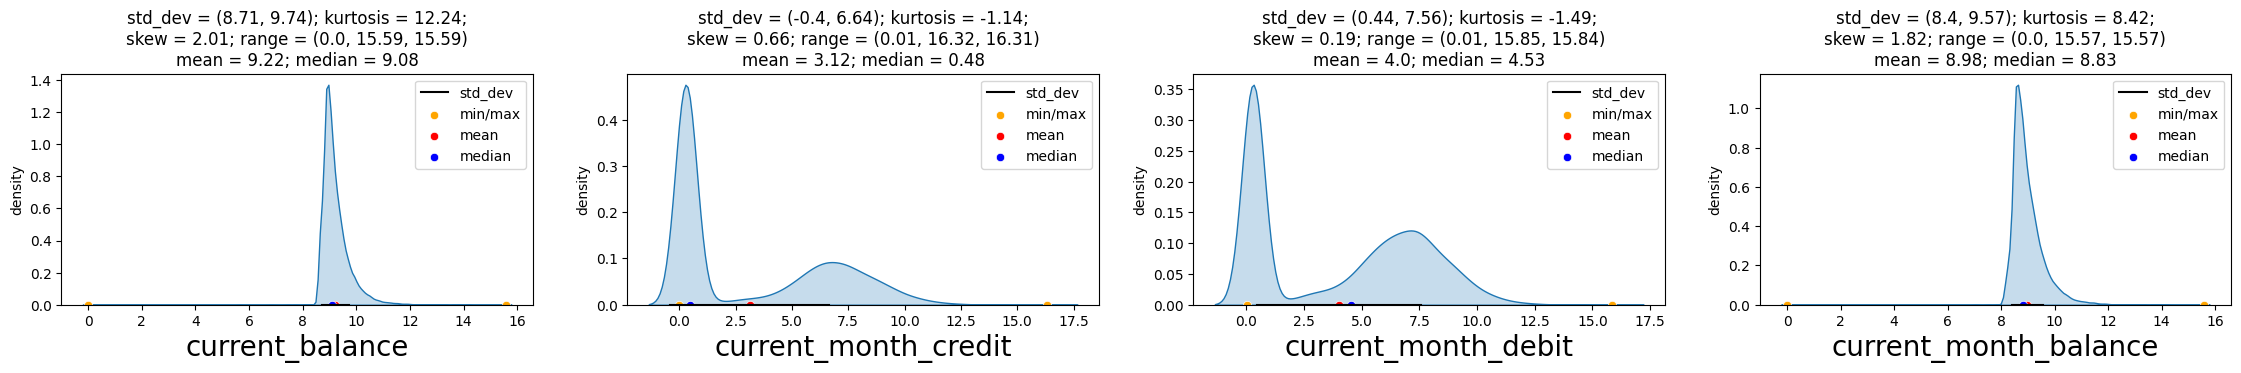

In [ ]:
KDE_UVA_numeric(numerical,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

### [1.6.3] previous_month

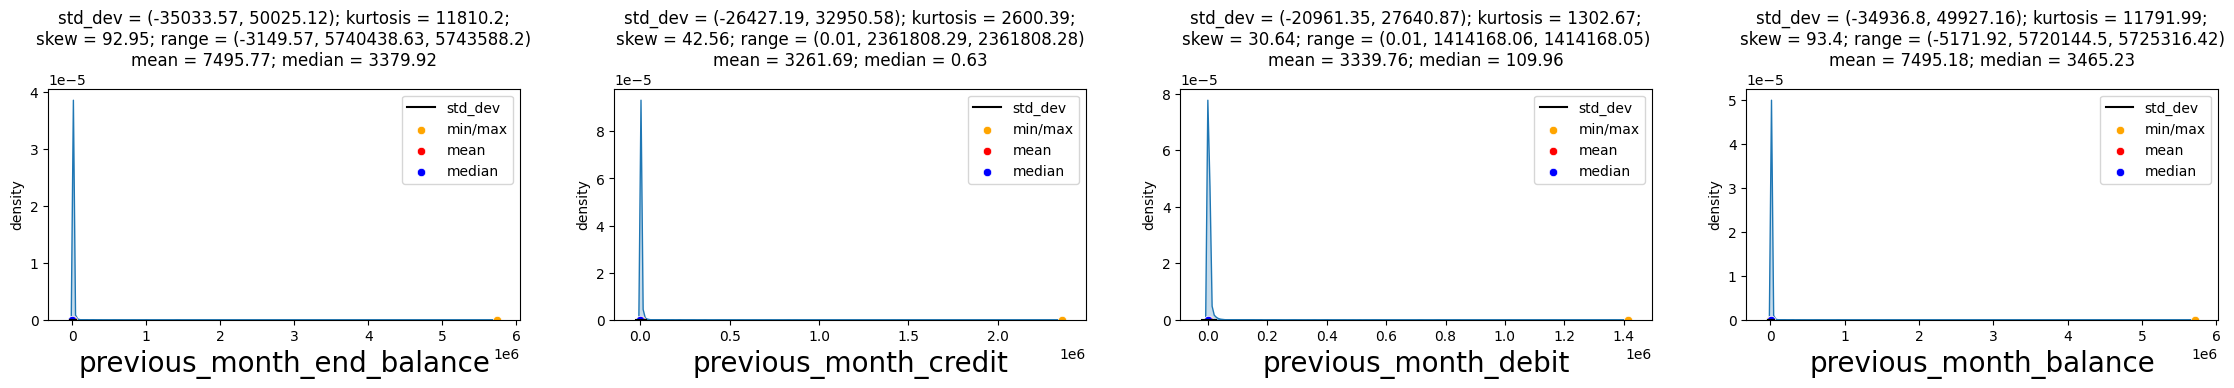

In [ ]:
KDE_UVA_numeric(data,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.


**Need to Remove Outliers to visulaise these plots**

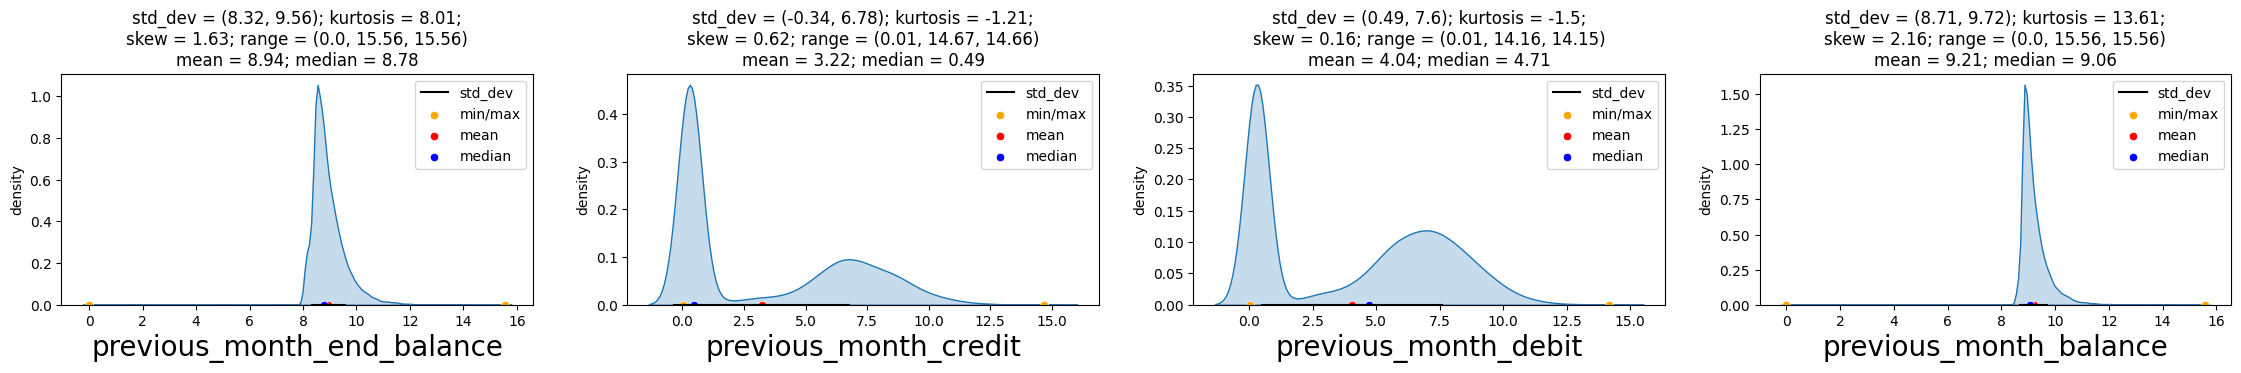

In [ ]:
KDE_UVA_numeric(numerical, previous_month)

### [1.6.4] previous_quarters

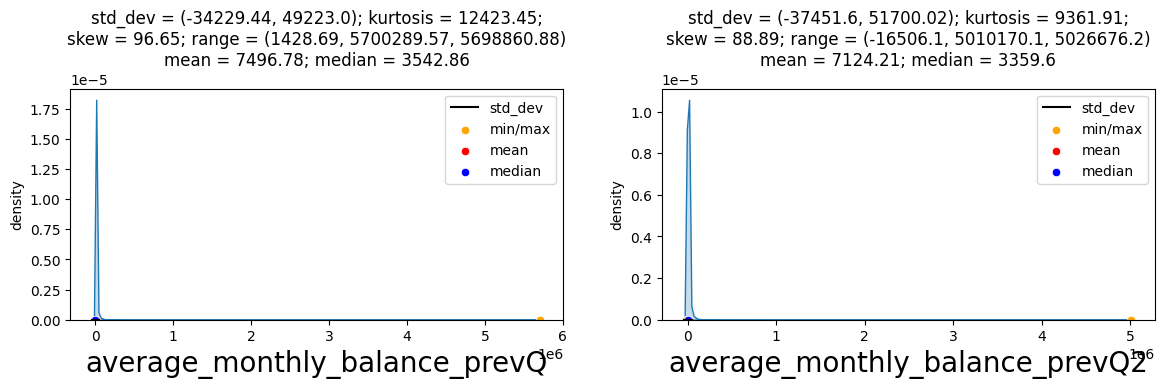

In [ ]:
KDE_UVA_numeric(data,previous_quarters)

**Summary**
The general trend still follows, it is crutial that we find the out if there is any common trait between the customers doing high high amount of transactions.

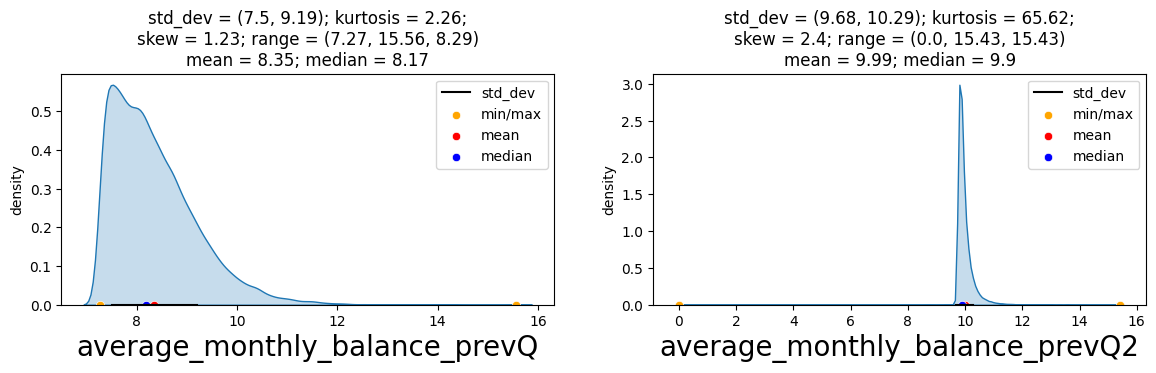

In [ ]:
KDE_UVA_numeric(numerical,previous_quarters)

### [1.6.5] transaction_date

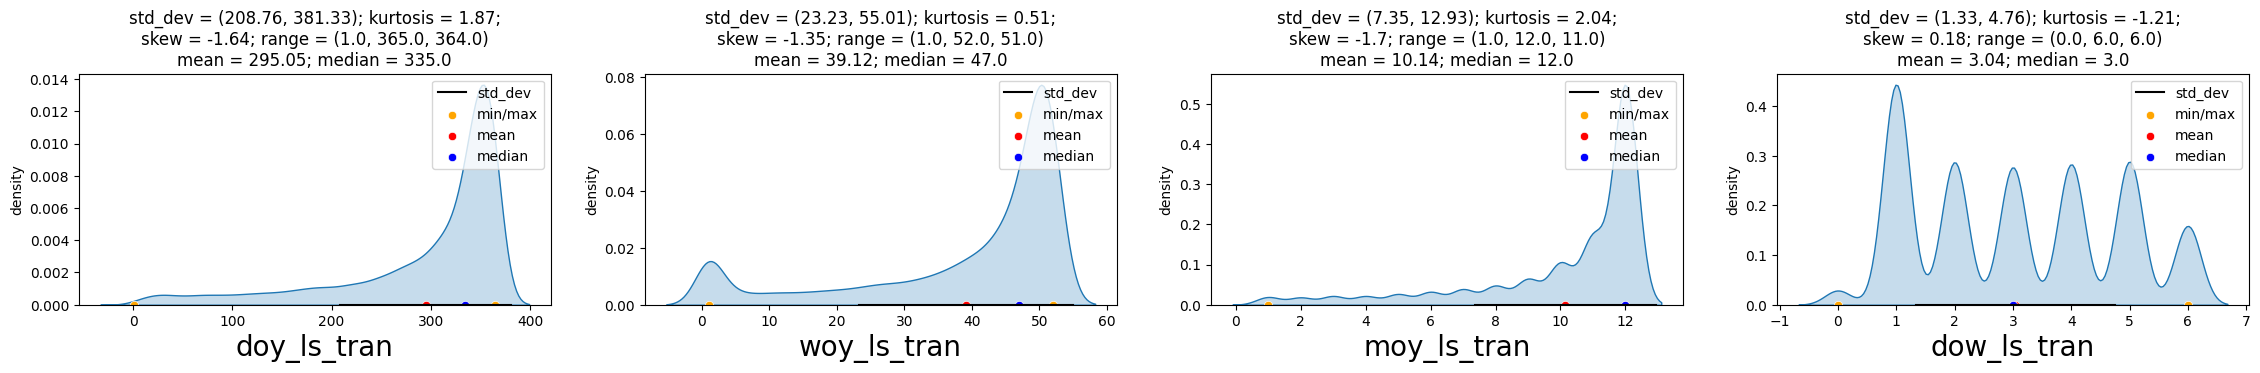

In [ ]:
KDE_UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## **[1.7] Univariate Analysis : Categorical Varibales**

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

**Grouping Varibales**

* **customer_info**: gender, occupation, customer_nw_category
* **account_info**: city, branch_code
* **churn**

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### [1.7.1] customer_info

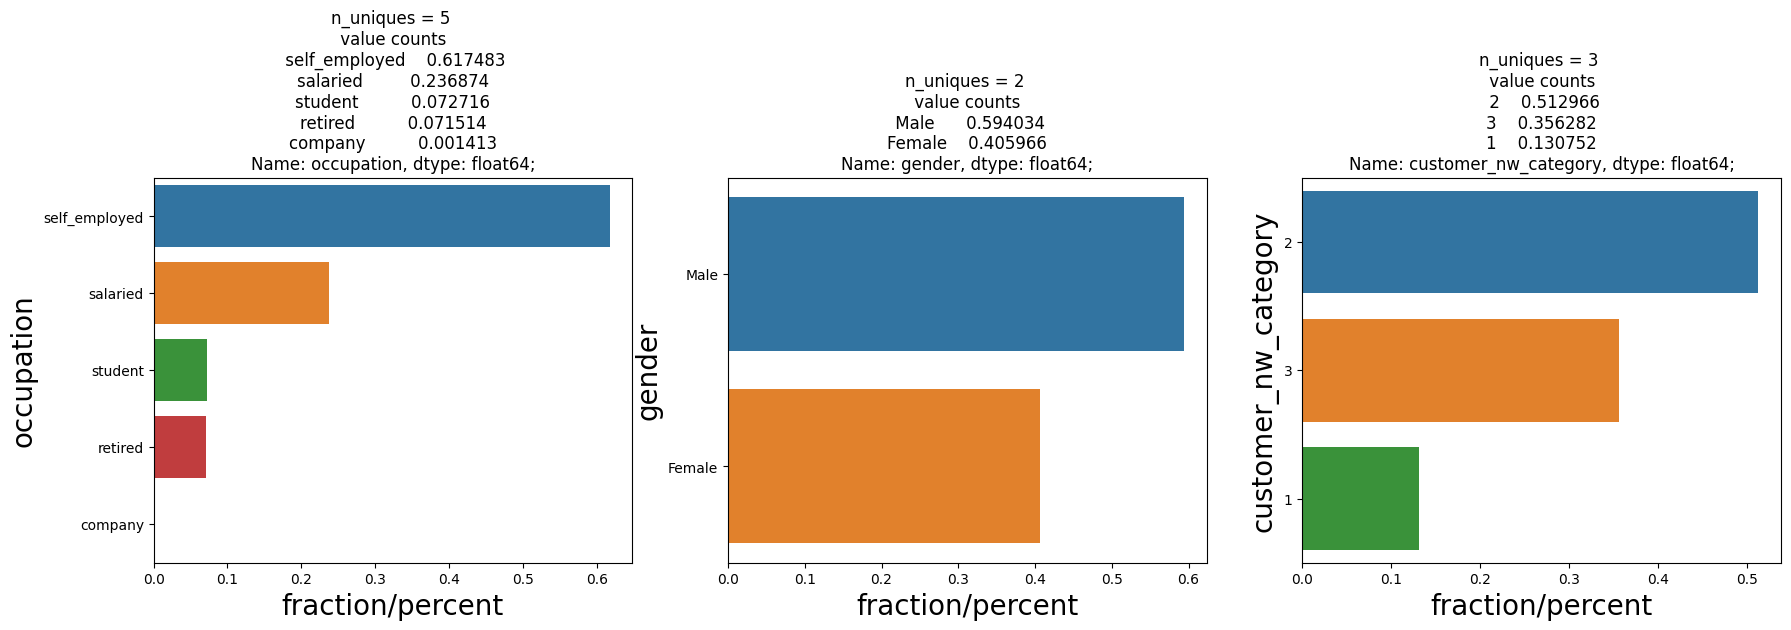

In [ ]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### [1.7.2] account_info

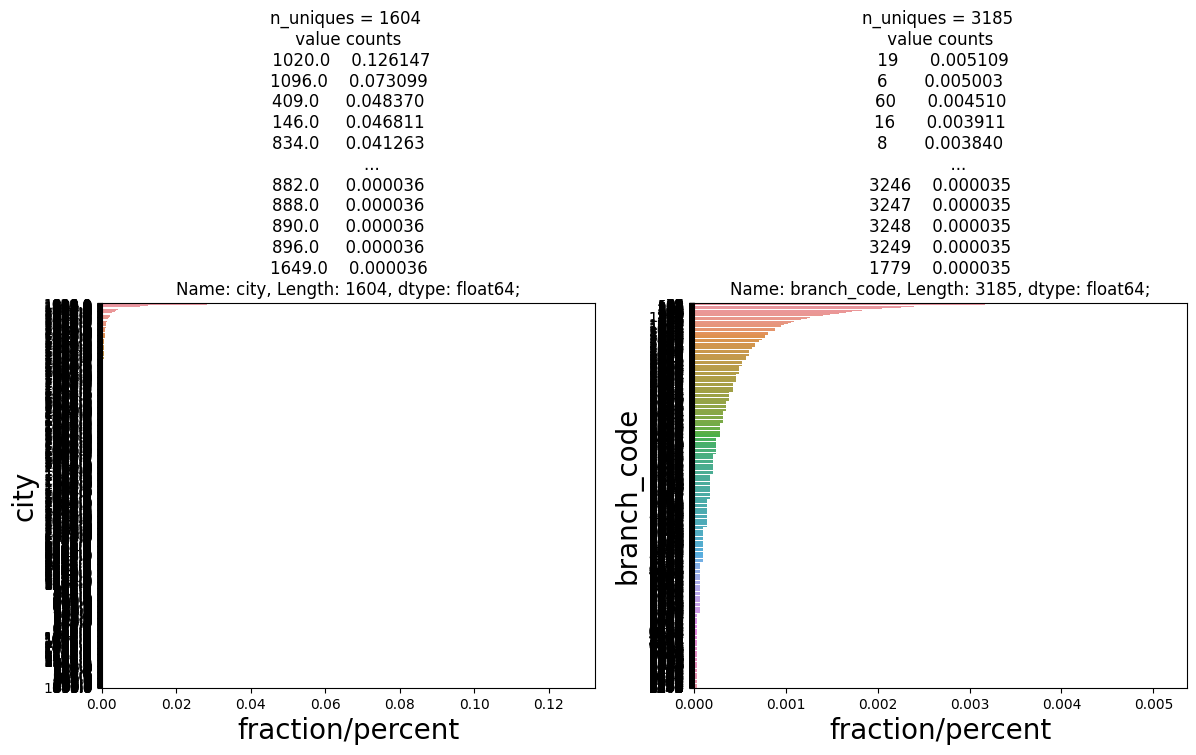

In [ ]:
UVA_category(data, ['city', 'branch_code'])

(0.0, 0.02)

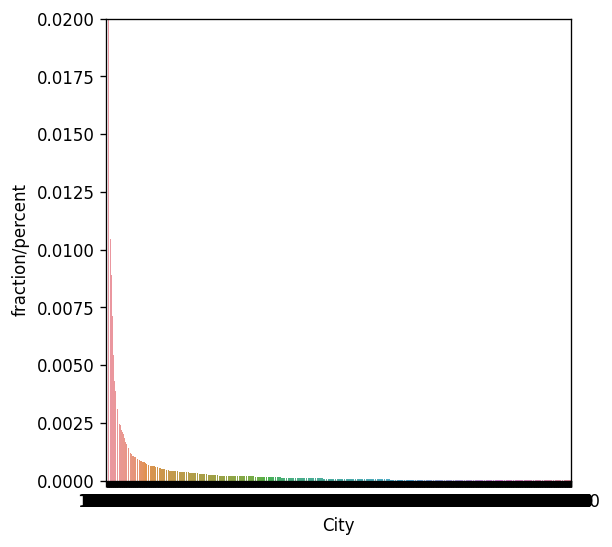

In [ ]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(x = city_count.index, y = city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

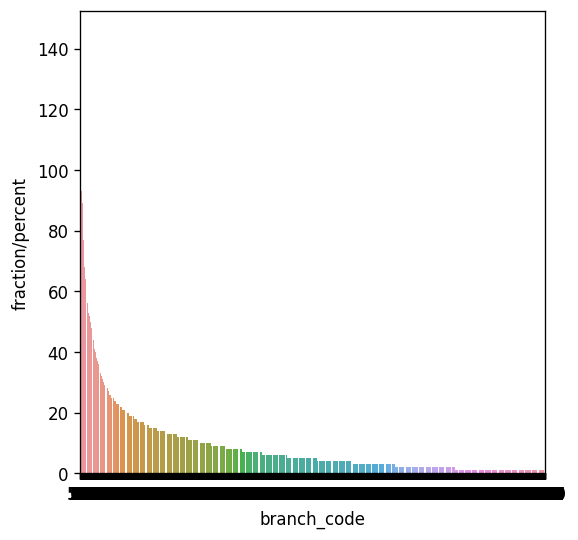

In [ ]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(x = branch_count.index, y = branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### [1.7.3] churn

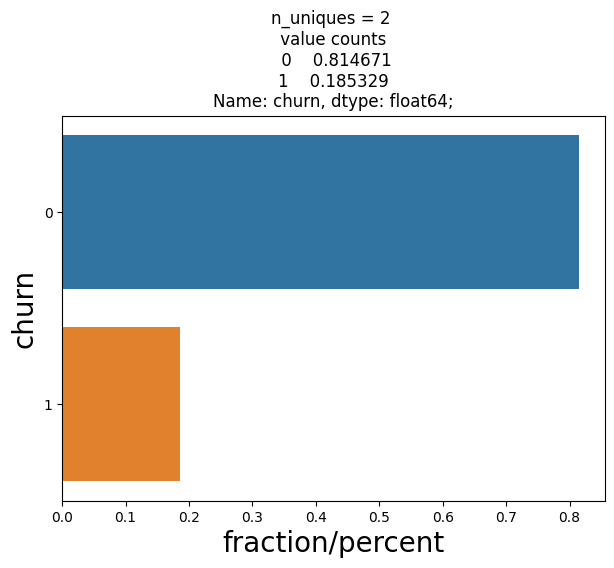

In [ ]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

### Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn?
5. Possibility that cities and branch code with very few accounts may lead to churning.


## **[1.8] Bivariate Analysis : Numerical-Numerical**

In [ ]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

### [1.8.1] Correlation Matrix

In [ ]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

customer_id   vintage       age  dependents  \
customer_id                        1.000000 -0.011288  0.001397   -0.009737   
vintage                           -0.011288  1.000000  0.003170    0.005109   
age                                0.001397  0.003170  1.000000   -0.003809   
dependents                        -0.009737  0.005109 -0.003809    1.000000   
current_balance                    0.014989 -0.007223  0.058925   -0.004554   
previous_month_end_balance         0.012414 -0.008001  0.062775   -0.000826   
average_monthly_balance_prevQ      0.011372 -0.010858  0.070903    0.000121   
average_monthly_balance_prevQ2     0.008060 -0.003824  0.081361    0.002584   
current_month_credit               0.004223 -0.004821  0.023921    0.002188   
previous_month_credit             -0.004819 -0.000410  0.027678    0.022772   
current_month_debit                0.004870 -0.004899  0.025366    0.006784   
previous_month_debit              -0.005906 -0.007777  0.027717    0.029073   
current_month_balance              0.012085 -0.008703  0.063120   -0.001859   
previous_month_balance             0.011025 -0.010439  0.067712    0.000241   
doy_ls_tran                       -0.006114 -0.000680  0.010754    0.079740   
woy_ls_tran                        0.011344 -0.010040  0.000501    0.034460   
moy_ls_tran                       -0.005374 -0.001359  0.011970    0.077978   
dow_ls_tran                        0.009665 -0.009683 -0.020895   -0.001702   

                                current_balance  previous_month_end_balance  \
customer_id                            0.014989                    0.012414   
vintage                               -0.007223                   -0.008001   
age                                    0.058925                    0.062775   
dependents                            -0.004554                   -0.000826   
current_balance                        1.000000                    0.809257   
previous_month_end_balance             0.809257                    1.000000   
average_monthly_balance_prevQ          0.857204                    0.908053   
average_monthly_balance_prevQ2         0.584156                    0.661439   
current_month_credit                   0.053329                    0.051080   
previous_month_credit                  0.101495                    0.195149   
current_month_debit                    0.075149                    0.100379   
previous_month_debit                   0.151771                    0.192376   
current_month_balance                  0.940234                    0.910206   
previous_month_balance                 0.812295                    0.912269   
doy_ls_tran                            0.035242                    0.024130   
woy_ls_tran                           -0.008980                    0.000946   
moy_ls_tran                            0.033127                    0.023485   
dow_ls_tran                           -0.000315                    0.002033   

                                average_monthly_balance_prevQ  \
customer_id                                          0.011372   
vintage                                             -0.010858   
age                                                  0.070903   
dependents                                           0.000121   
current_balance                                      0.857204   
previous_month_end_balance                           0.908053   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.731953   
current_month_credit                                 0.051294   
previous_month_credit                                0.138967   
current_month_debit                                  0.091491   
previous_month_debit                                 0.187226   
current_month_balance                                0.920943   
previous_month_balance                               0.983797   
doy_ls_tran                                          

### [1.8.2] Heatmap

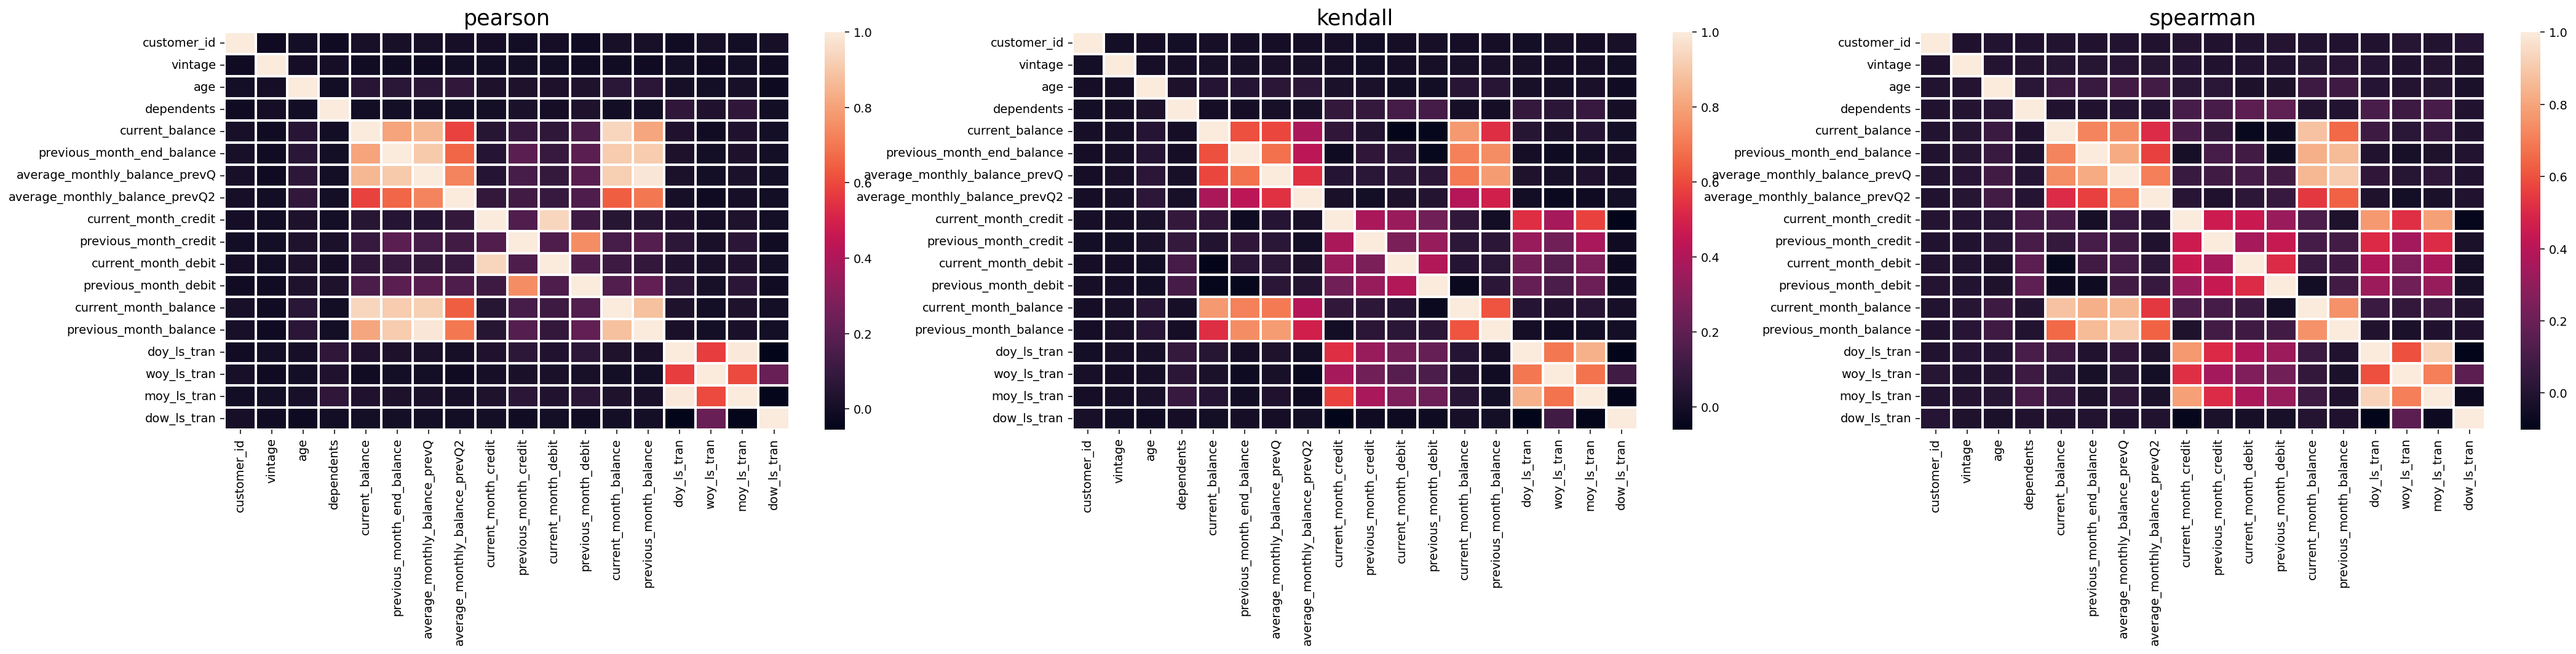

In [ ]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [ ]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

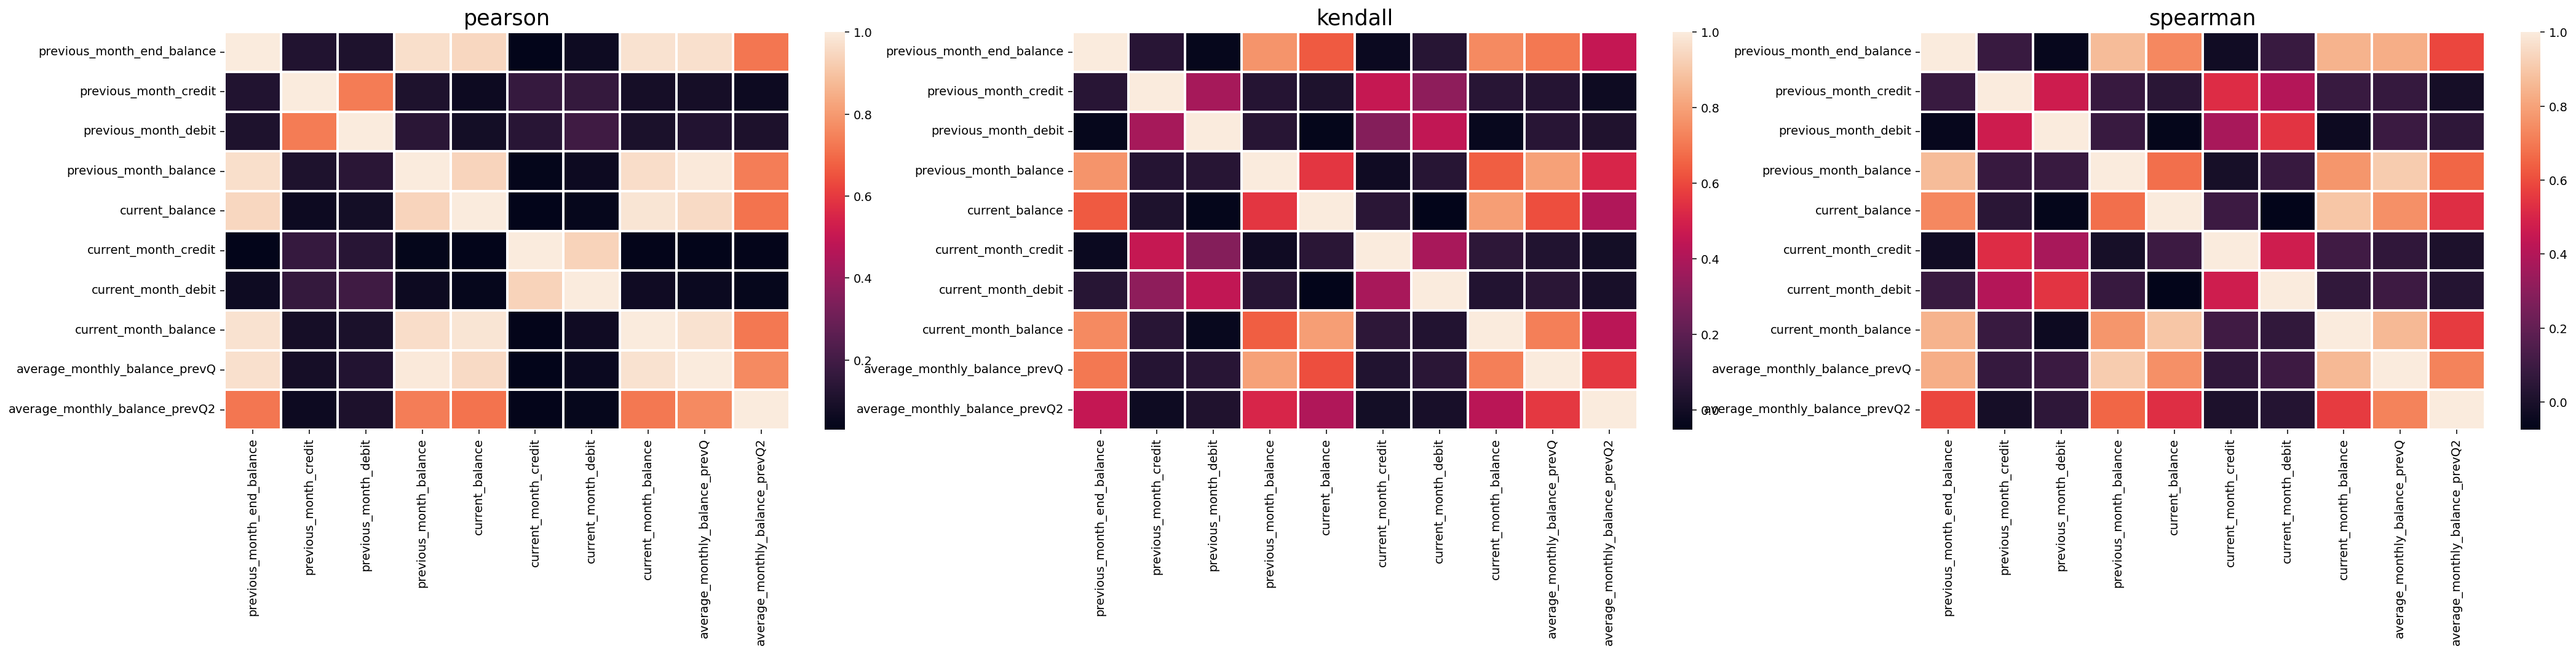

In [ ]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



### [1.8.3] Scatterplot

In [ ]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 896x672 with 0 Axes>

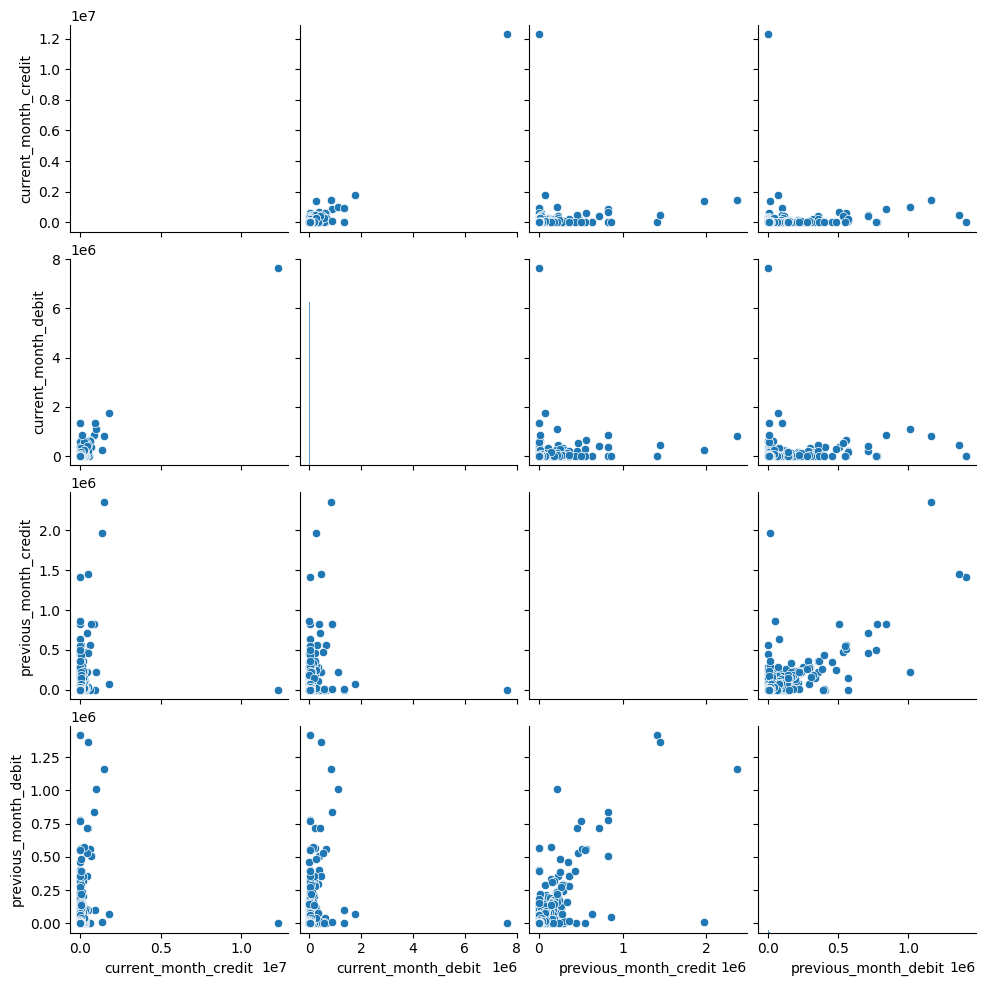

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**the scatter plot is is not meaningful due to the presence of outliers**

In [ ]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1

  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

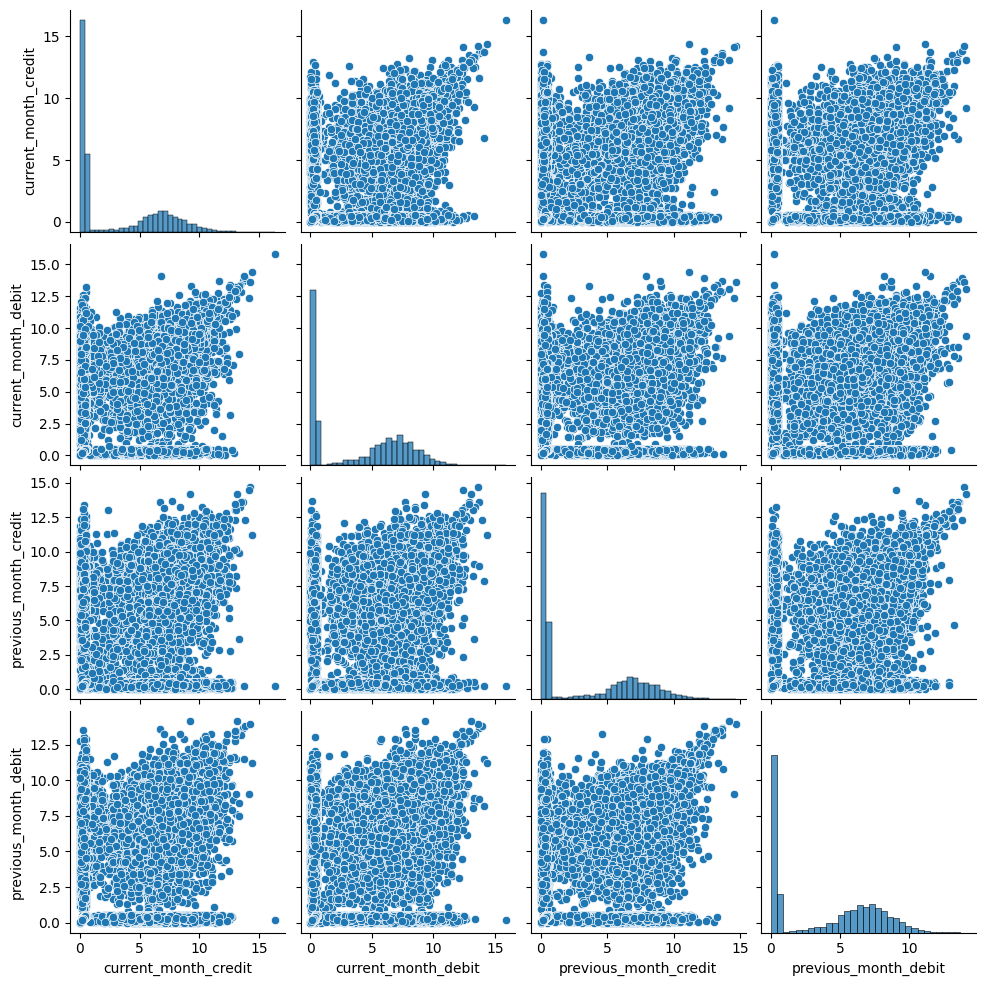

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 896x672 with 0 Axes>

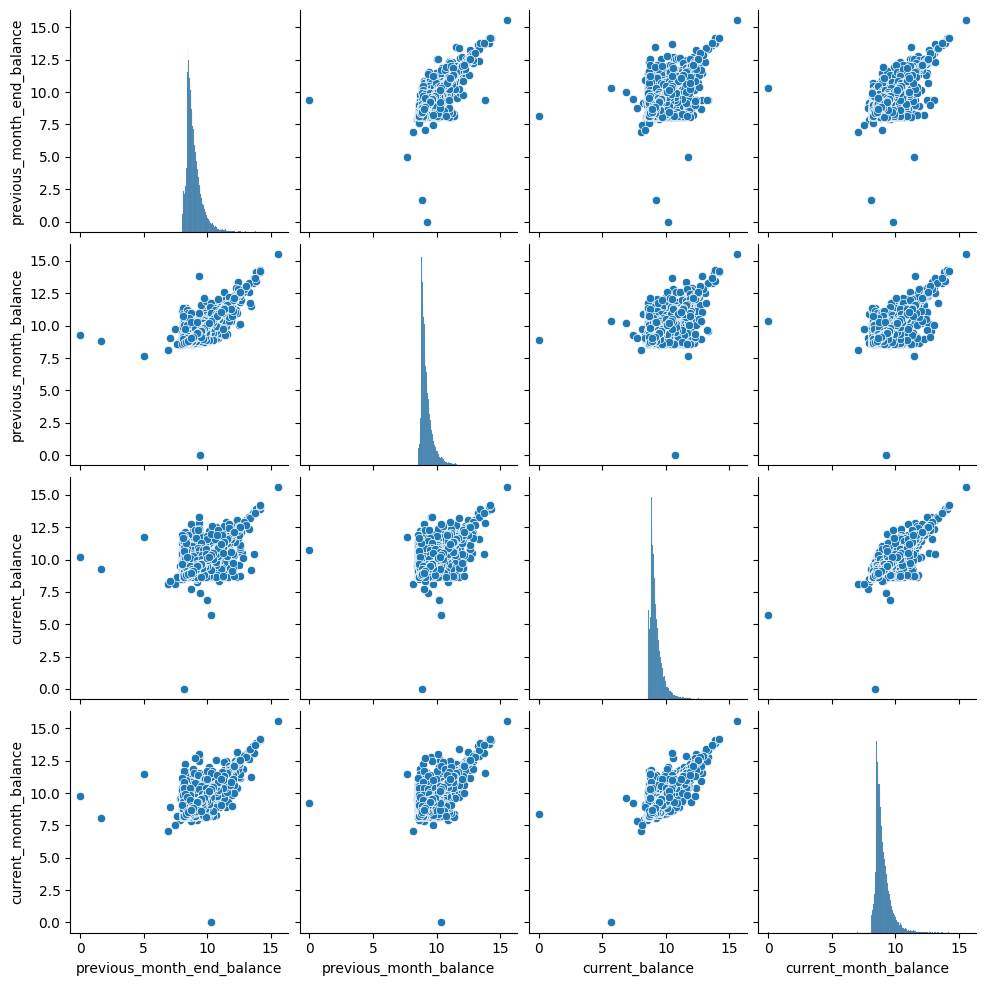

In [ ]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Axes: xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

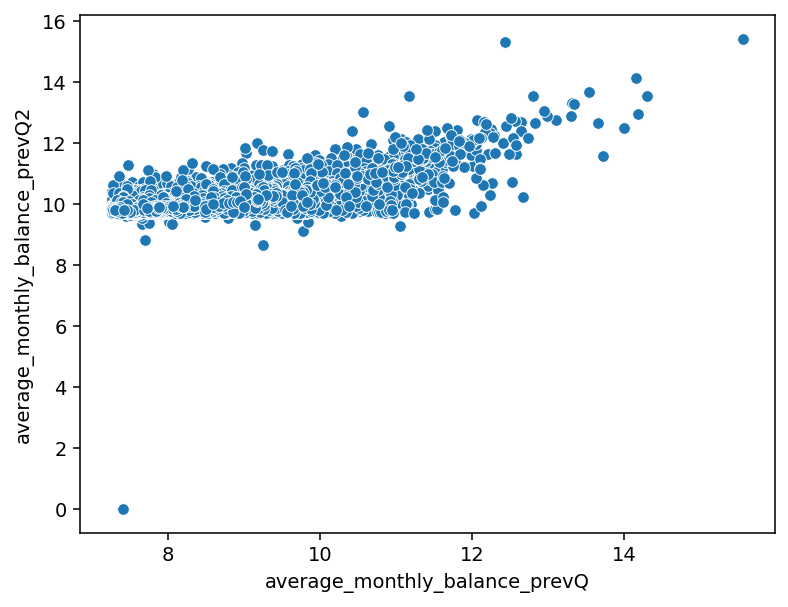

In [ ]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x = numerical['average_monthly_balance_prevQ'], y = numerical['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

## **[1.9] Bivariate : Categorical-Categorical**

#### List of Hypothesis to check under this combination
1.   Are females less likely to churn than males?
2.   Are young customers more likely to churn?
3.   Are customers in the lower income bracket more likely to churn?
4.   Are customers with dependent(s) less likely to churn?
5.   Customers with an average family size less than 4 are more likely to churn?
6.   Customers whose last transaction was more than 6 months ago, do they have higher churn rate?
7.   Possibility that cities and branch code with very few accounts may lead to churning.

**Missing Values** - finding behaviour

**Gender**:
  *  Do missing values churn more?

**Dependents**:
  *  Do missing values have any relation with churn?

**Occupation:**
   * Do they have some relation with churn?

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)

  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1. Are females less likely to churn than males?

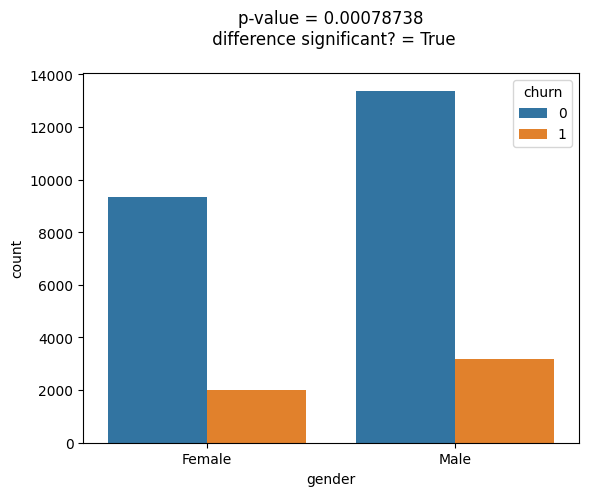

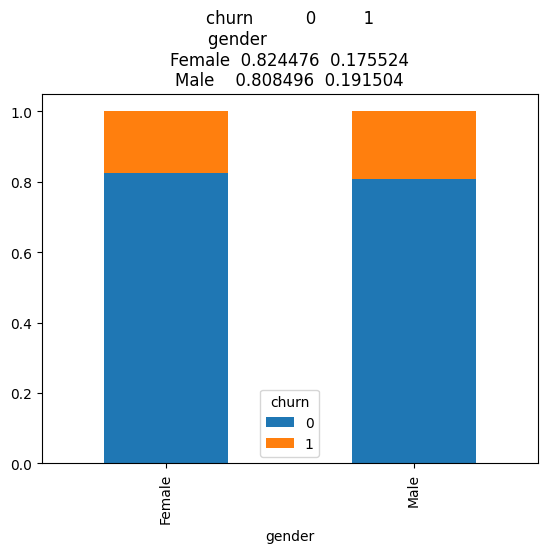

In [ ]:
BVA_categorical_plot(data, 'churn', 'gender')

**Result:**

the difference between the males and females customer churning is significant.

### 2. Are young customers more likely to churn?

In [ ]:
# segregating customers into segments
churn = data[['churn','age']][:]
churn['age_group'] = 'str'
churn['age_group'][churn['age']>=80] = 'very old'
churn['age_group'][(churn['age']<80) & (churn['age']>=60)] = 'senior citizen'
churn['age_group'][(churn['age']<60) & (churn['age']>=18)] = 'adult'
churn['age_group'][churn['age']<18] = 'young'

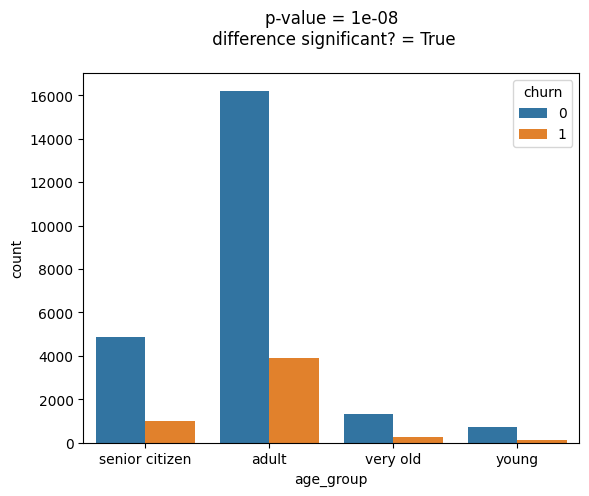

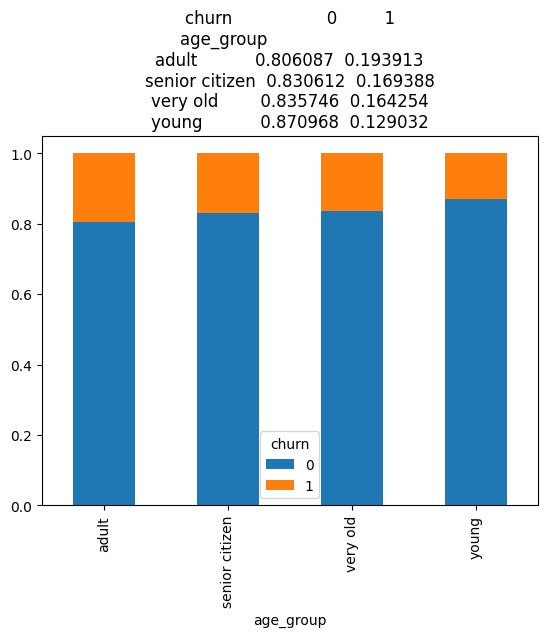

In [ ]:
BVA_categorical_plot(churn, 'churn', 'age_group')

**Result**:
Age group has significant effect on the churning rate.

### 3. Customers from low income bracket more likely to churn

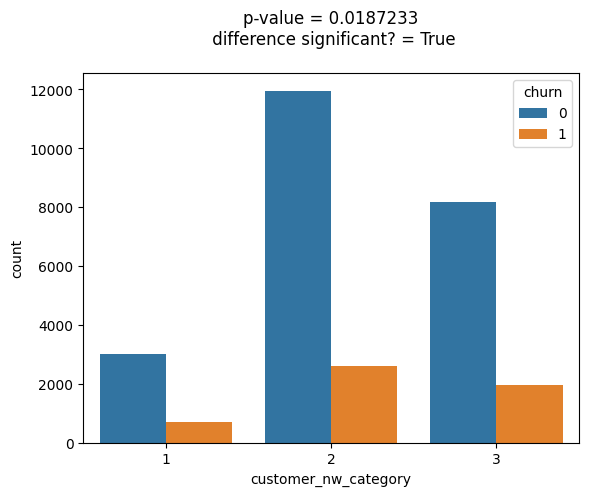

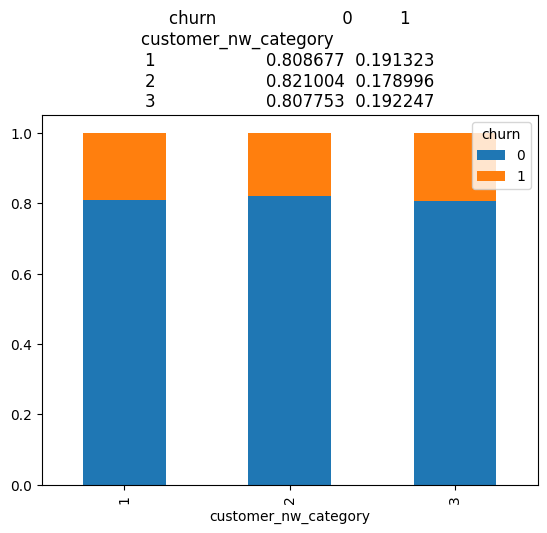

In [ ]:
BVA_categorical_plot(data, 'churn', 'customer_nw_category')

**Result:**
Different income brackets have significant effect on the churn rate.

### 4,5. Are customers with dependent(s) less likely to churn?

In [ ]:
# segregating dependents into categories
dependents = data[['churn','dependents']][:]
dependents.dropna()
dependents['dep_group'] = None
dependents['dep_group'][dependents['dependents']==0] = 'single'
dependents['dep_group'][(dependents['dependents']>=1) & (dependents['dependents']<=3)] = 'small family'
dependents['dep_group'][(dependents['dependents']>=4) & (dependents['dependents']<=9)] = 'large family'
dependents['dep_group'][(dependents['dependents']>=10)] = 'joint family'

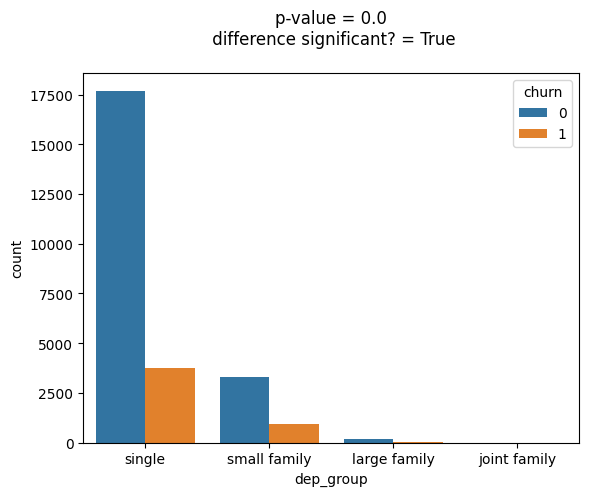

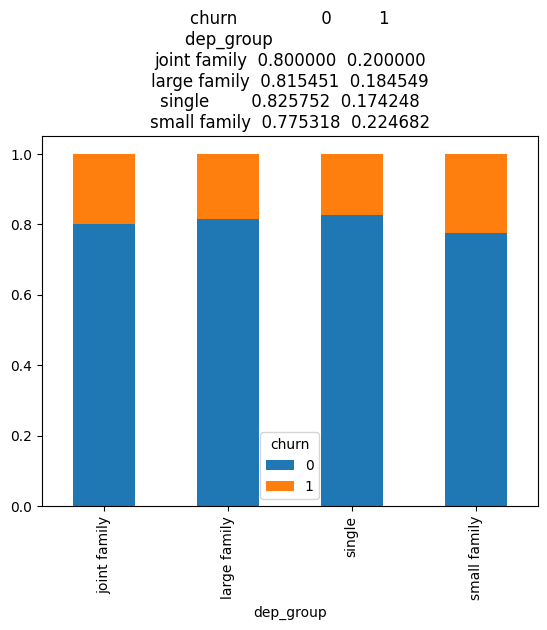

In [ ]:
BVA_categorical_plot(dependents, 'churn', 'dep_group')

**Result:**

Number of dependents also play significant role in churning.

### 6. Customers whose last transaction was more than 6 months ago, they have a higher churn rate?

In [ ]:
# segregating customers whose last transaction was more than 6 onths ago

transaction = data[['churn','moy_ls_tran']]
transaction['moy_ls_tran'] = transaction['moy_ls_tran'].map(lambda x: 'more than 6 months ago' if x<7 else 'within 6 months')

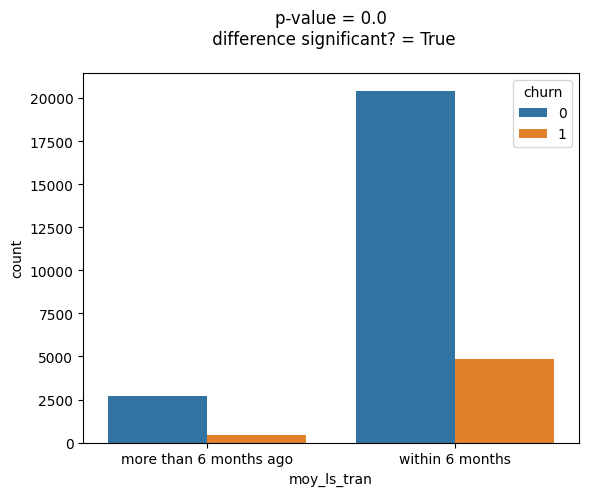

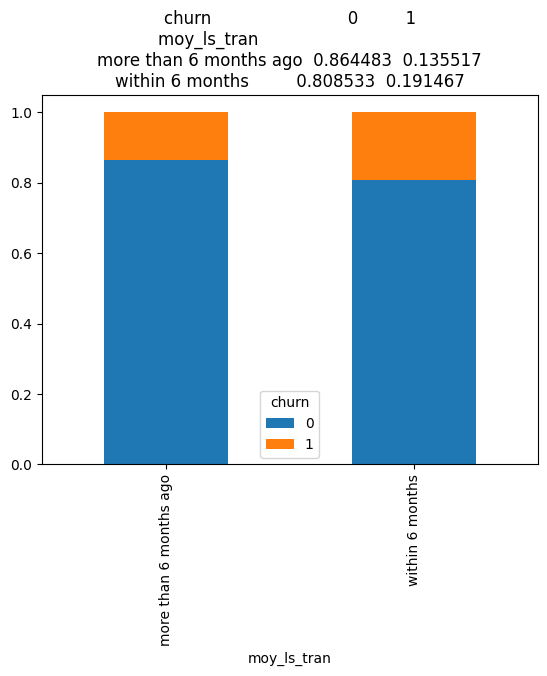

In [ ]:
BVA_categorical_plot(transaction, 'churn', 'moy_ls_tran')

**Result**

there is a significant difference between the people who made their last transaction in last 6 months and the customers who had their last transaction more than 6 months ago.

### 7. Possibility that cities and branch code with very few accounts may lead to churning.

#### City

In [ ]:
# getting city codes which have less than 280 (1%) of accounts
tmp = data['city'].value_counts()[:]
cities = tmp[tmp<280].index

In [ ]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None
churn_acc['city_cat'][churn_acc['city'].isin(cities[:])] = 'low accounts'
churn_acc['city_cat'][~churn_acc['city'].isin(cities[:])] = 'high accounts'

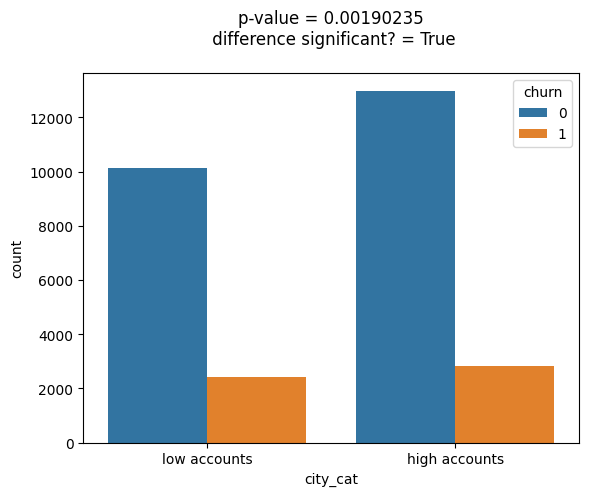

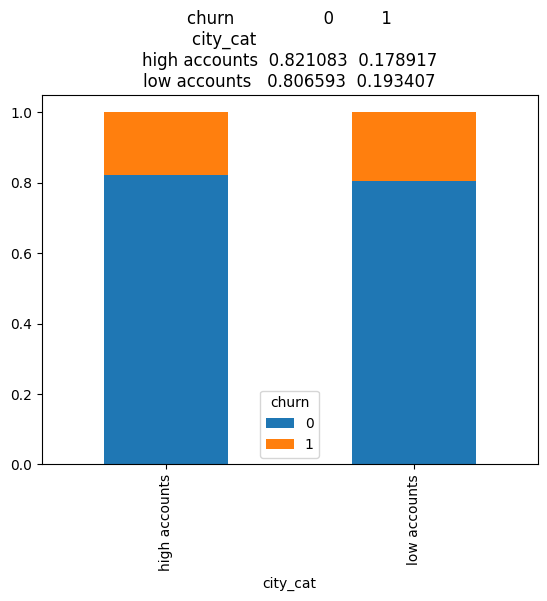

In [ ]:
BVA_categorical_plot(churn_acc, 'churn', 'city_cat')

**Result**

cities having less than 1 percent of the total have significantly different churn rates as compared to the cities with more accounts.

#### branch_code

In [ ]:
# getting branch codes with more than 0.5% of total accounts
tmp = data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

In [ ]:
# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None
churn_acc['branch_cat'][churn_acc['branch_code'].isin(branch[:])] = 'low accounts'
churn_acc['branch_cat'][~churn_acc['branch_code'].isin(branch[:])] = 'high accounts'

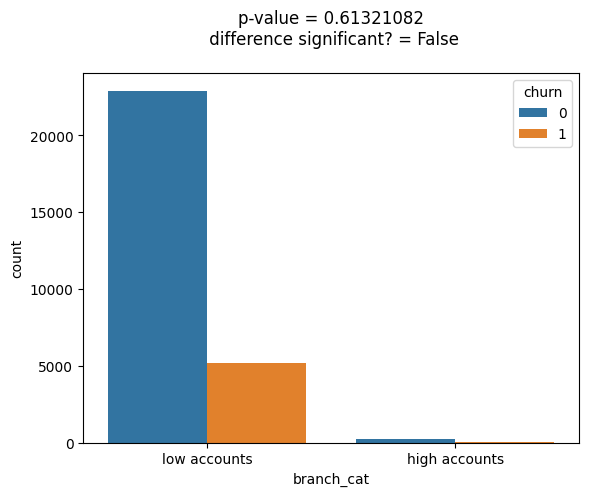

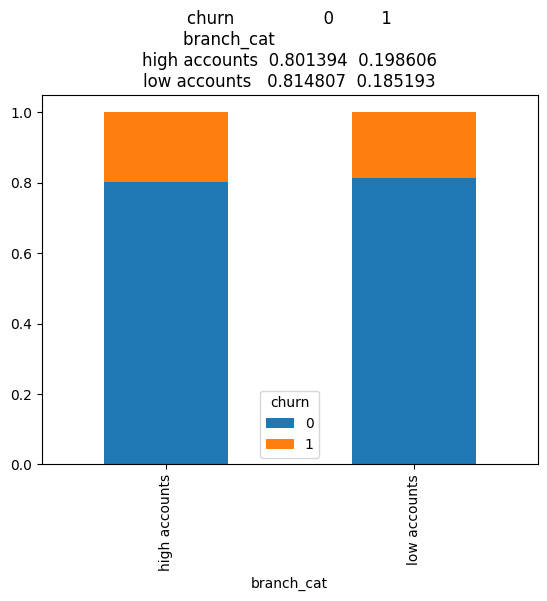

In [ ]:
BVA_categorical_plot(churn_acc, 'churn', 'branch_cat')

**Resilt:**

There is no significant difference between the high account count branches and low account count branches.

### Missing Values: Gender

In [ ]:
# isolating rows with missing gender
miss_gender = data[:]
miss_gender['missing_gender'] = 'not_missing'
miss_gender['missing_gender'][~miss_gender['gender'].isin(['Male','Female'])] = 'missing value'

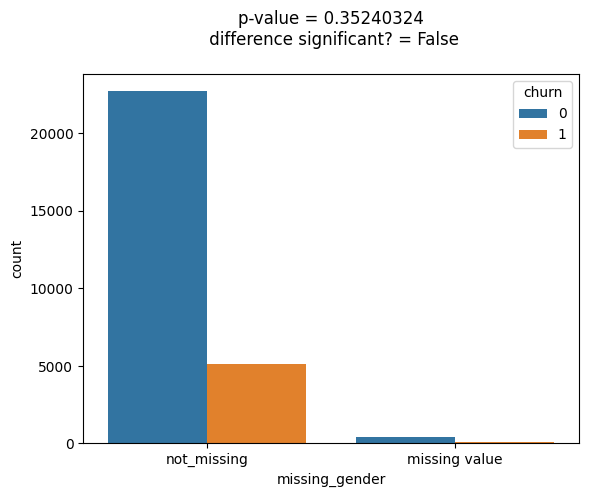

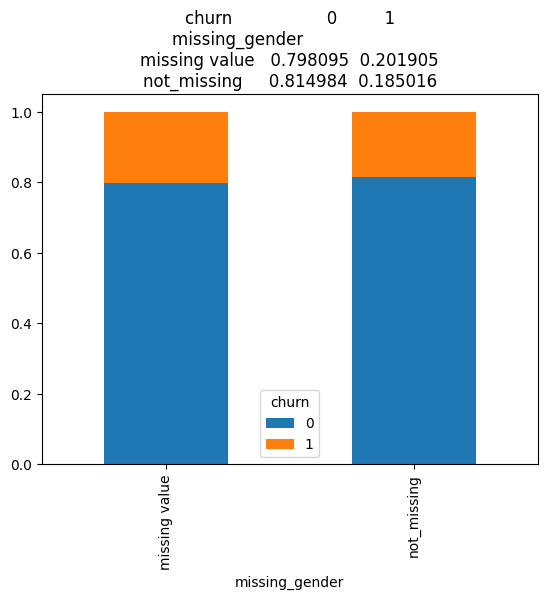

In [ ]:
BVA_categorical_plot(miss_gender, 'churn', 'missing_gender')

**There is no diffrent behaviour of the missing values in gender wrt target**


### Missing values : Depedents

In [ ]:
# isolating rows with missing gender
miss_dependents = data[:]
miss_dependents['missing_dependents'] = 'not_missing'
miss_dependents['missing_dependents'][~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4,
                                                                           6, 5, 9, 52, 36, 50,
                                                                           8, 25, 32])] = 'missing value'

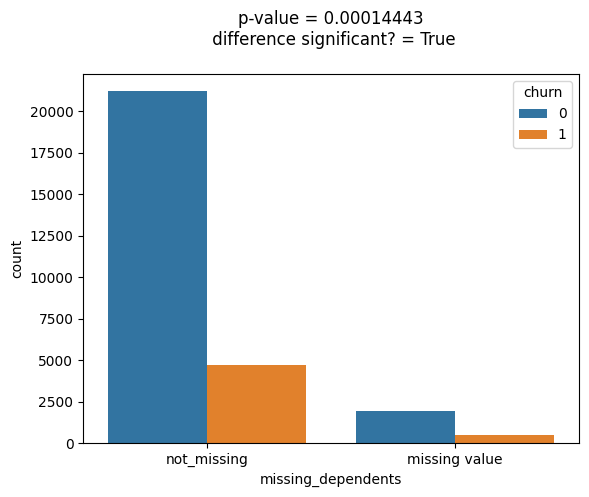

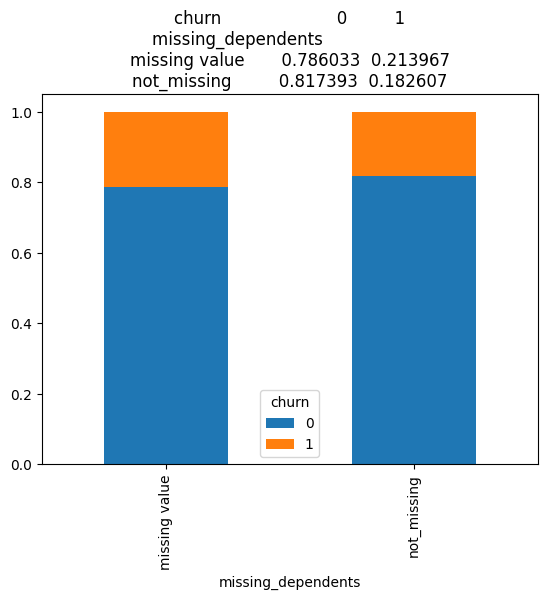

In [ ]:
BVA_categorical_plot(miss_dependents, 'churn', 'missing_dependents')

Missing values in dependents have significantly different churning rate than the rest of the data.

### Missing values : Occupation

In [ ]:
# isolating rows with missing gender
miss_occupation = data[:]
miss_occupation['missing_occupation'] = 'not_missing'
miss_occupation['missing_occupation'][~miss_occupation['occupation'].isin(['self_employed',
                                                                           'salaried',
                                                                           'retired',
                                                                           'student',
                                                                           'company'])] = 'missing value'

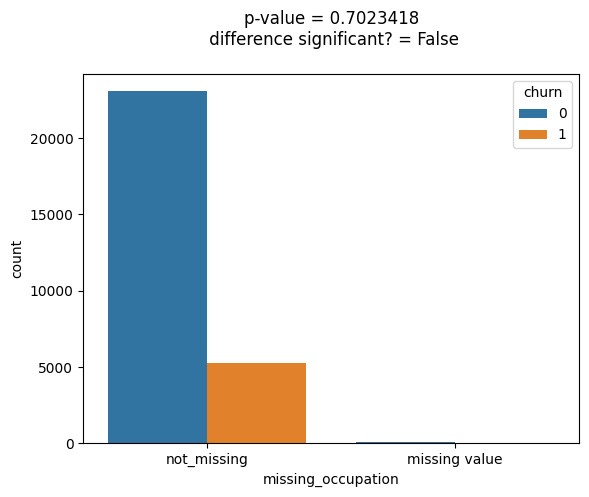

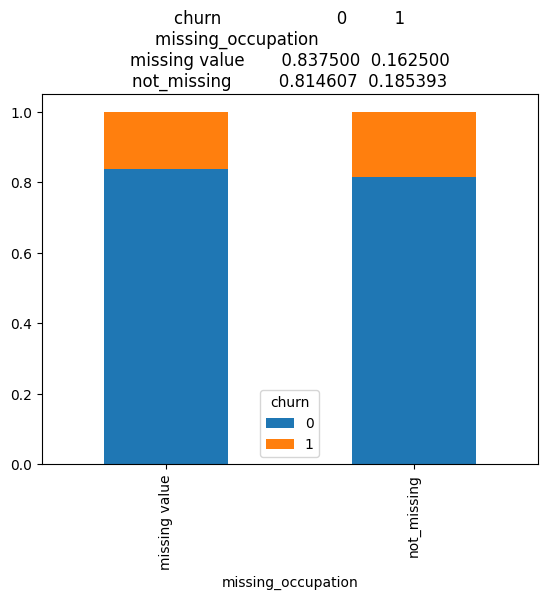

In [ ]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')

**Missing values in occupation does not have any significantly different relation with churn rate.**

## **[1.10] Bivariate Analysis: Numerical-Categorical variables**

List of Hypothesis and investigation to perform under this combination.

1.  Are vintage customers less likely to churn?
2.  Are customers with higher average balance less likely to churn?
3.  Are customers dropping monthly balance highly likely to churn?


In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]

  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()

  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)

  #barplot
  plt.subplot(1,2,1)
  sns.barplot(x = [str(category),'not {}'.format(category)], y = [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')


### 1. Are vintage customers less likely to churn?



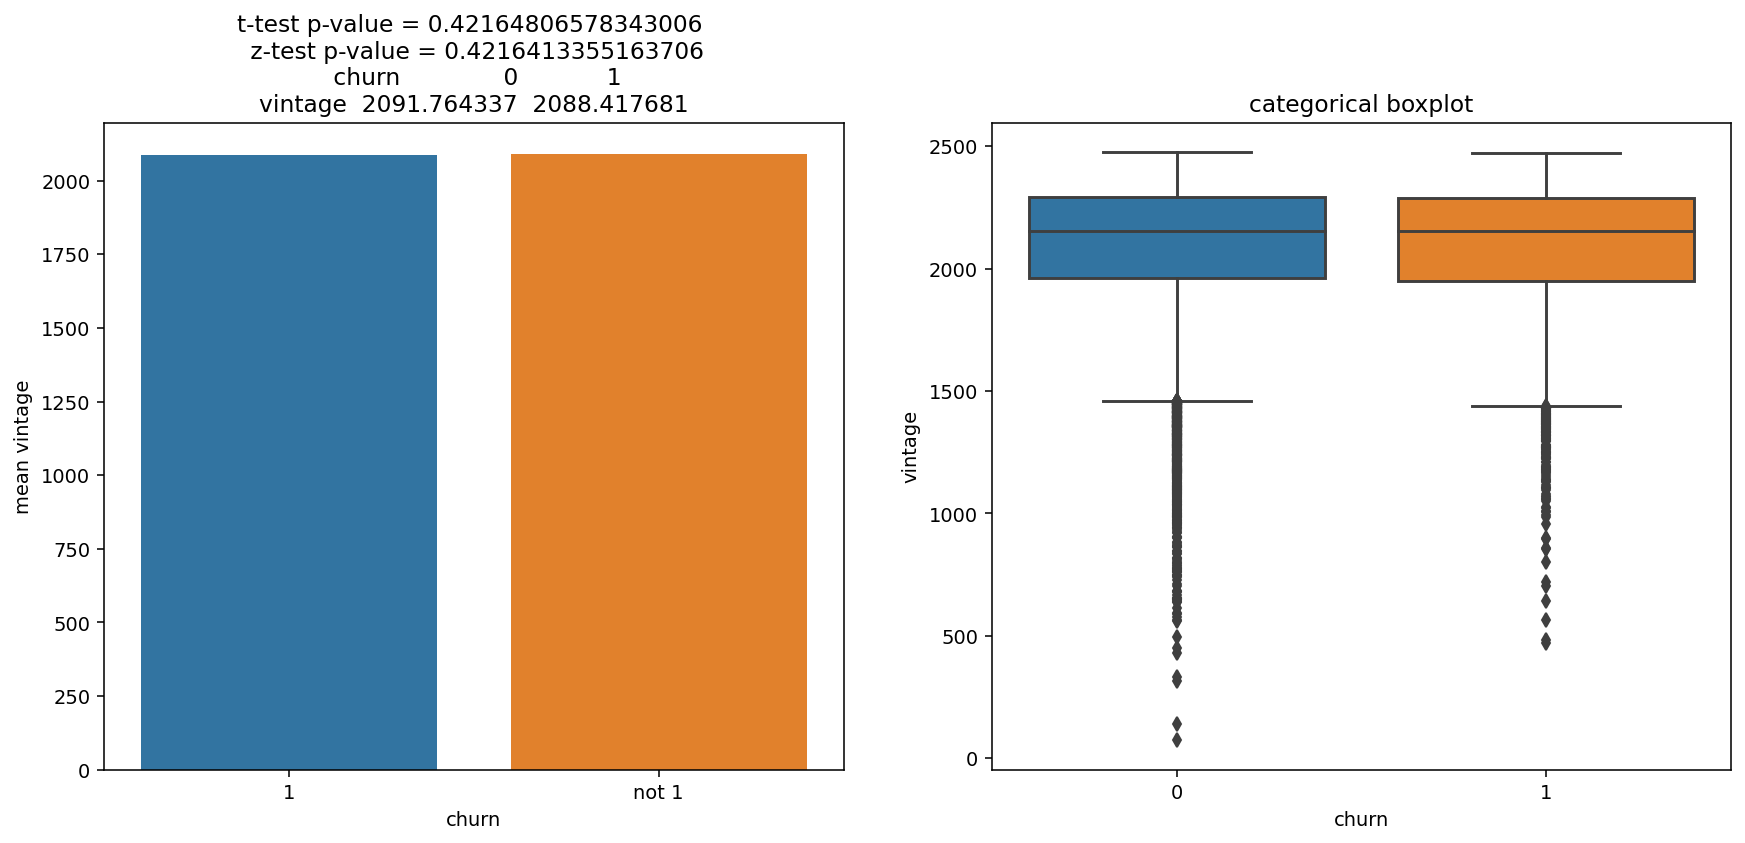

In [ ]:
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

**Inferences**

1.    Vintage customers churned more, but results are not significantly different
2.    Boxplot shows very similar distribution with outliers on the lower end.

**Result**

We can safely reject the hypothesis that vintage customers are more likely to churn.

### 2. Are customers with higher average balance less likely to churn?

#### Average balance in previous quarters

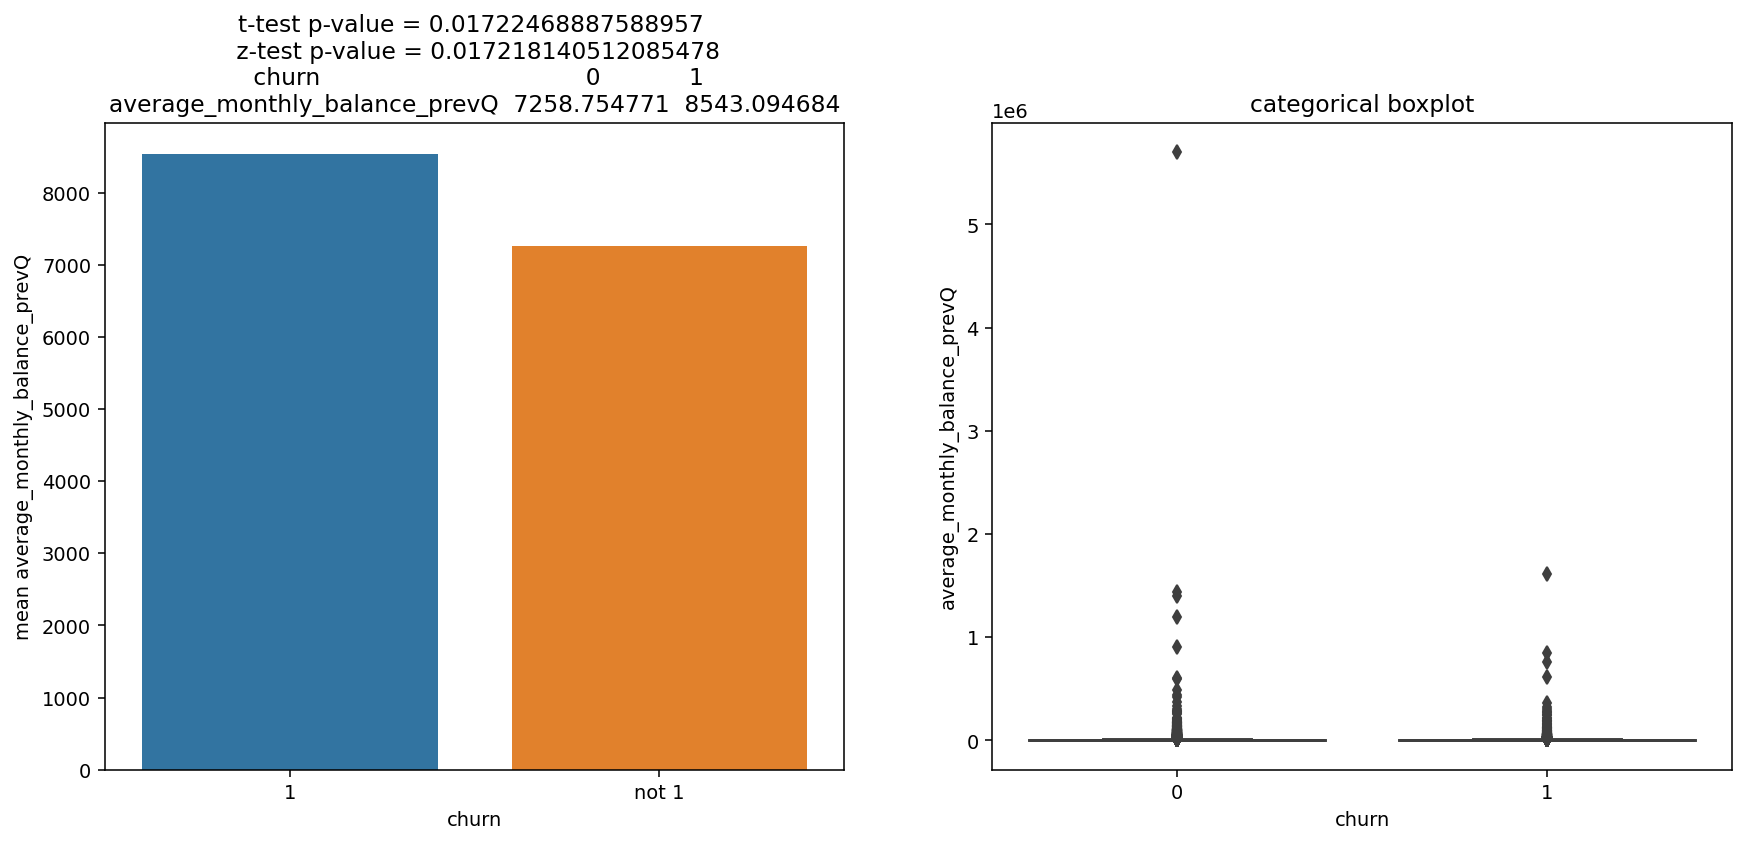

In [ ]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

**Inferences**
*    Customers who churned have significantly higher balance during immediate preceeding quarter.

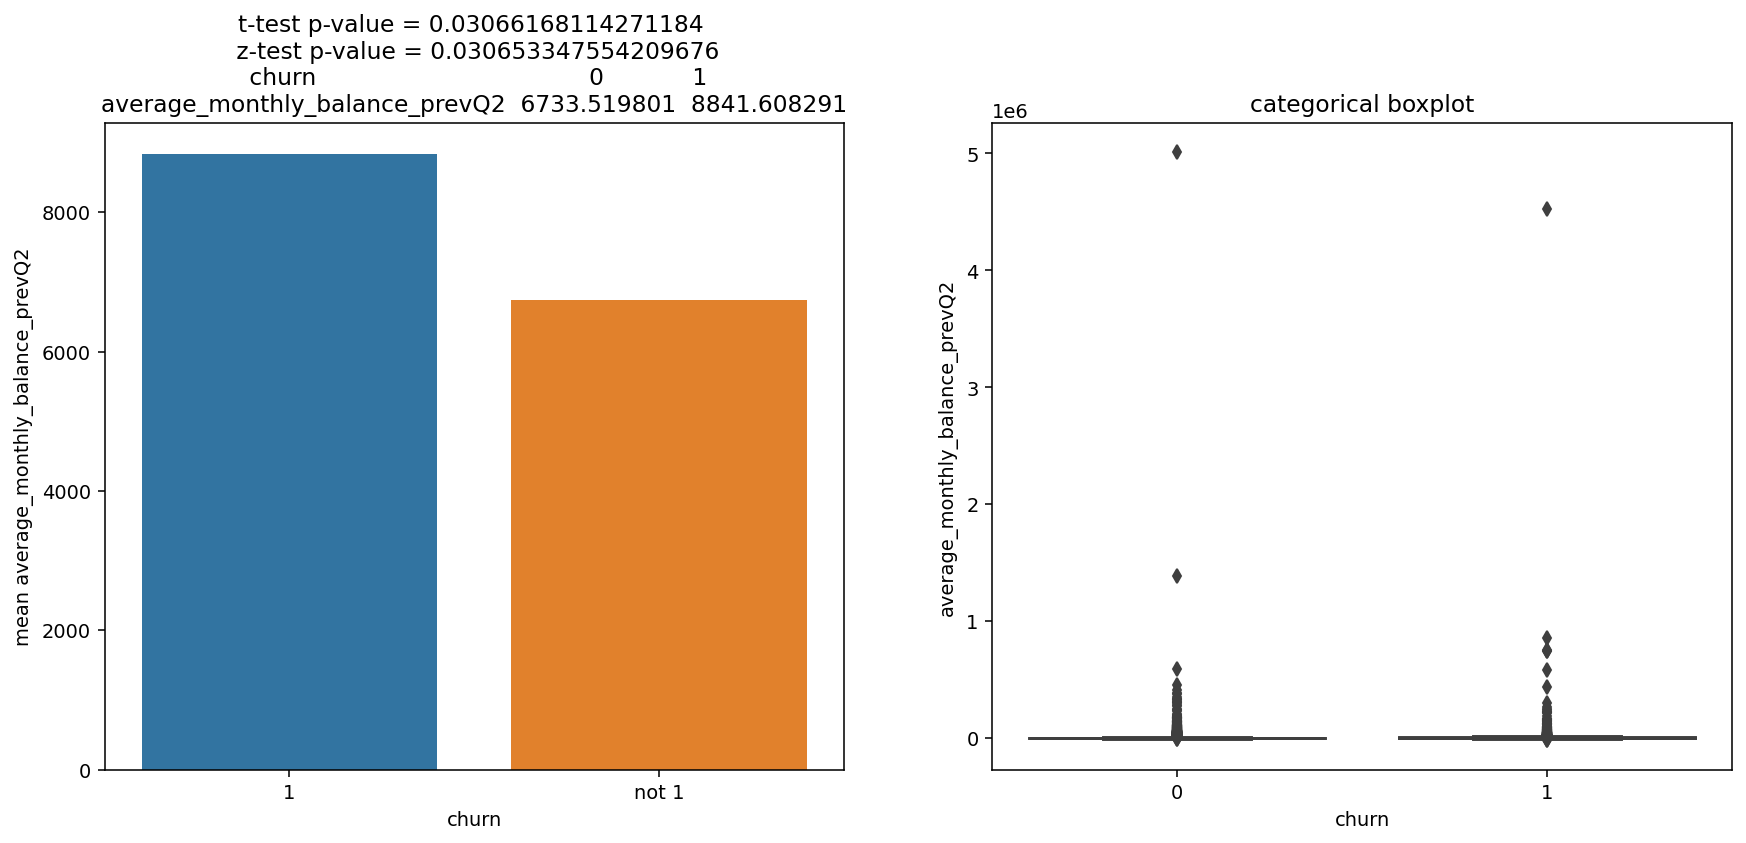

In [ ]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

**Inferences**

We can see that people who churned actually had significantly higher balance during their previous two quarters.


#### previous month/current month

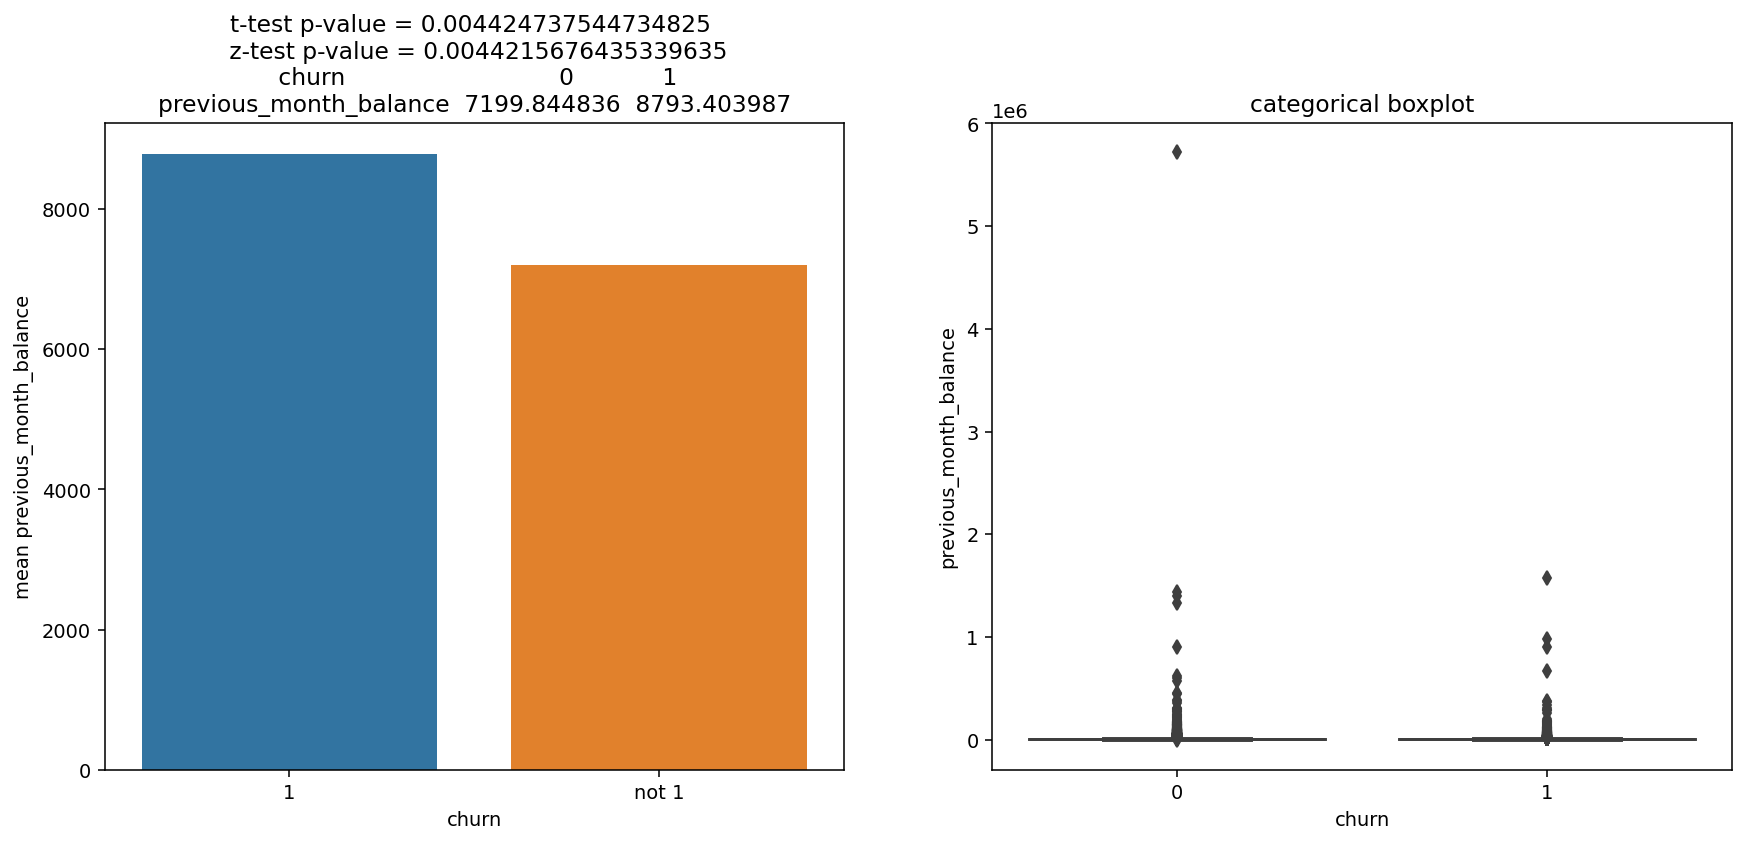

In [ ]:
Bivariate_cont_cat(data, 'previous_month_balance', 'churn', 1)

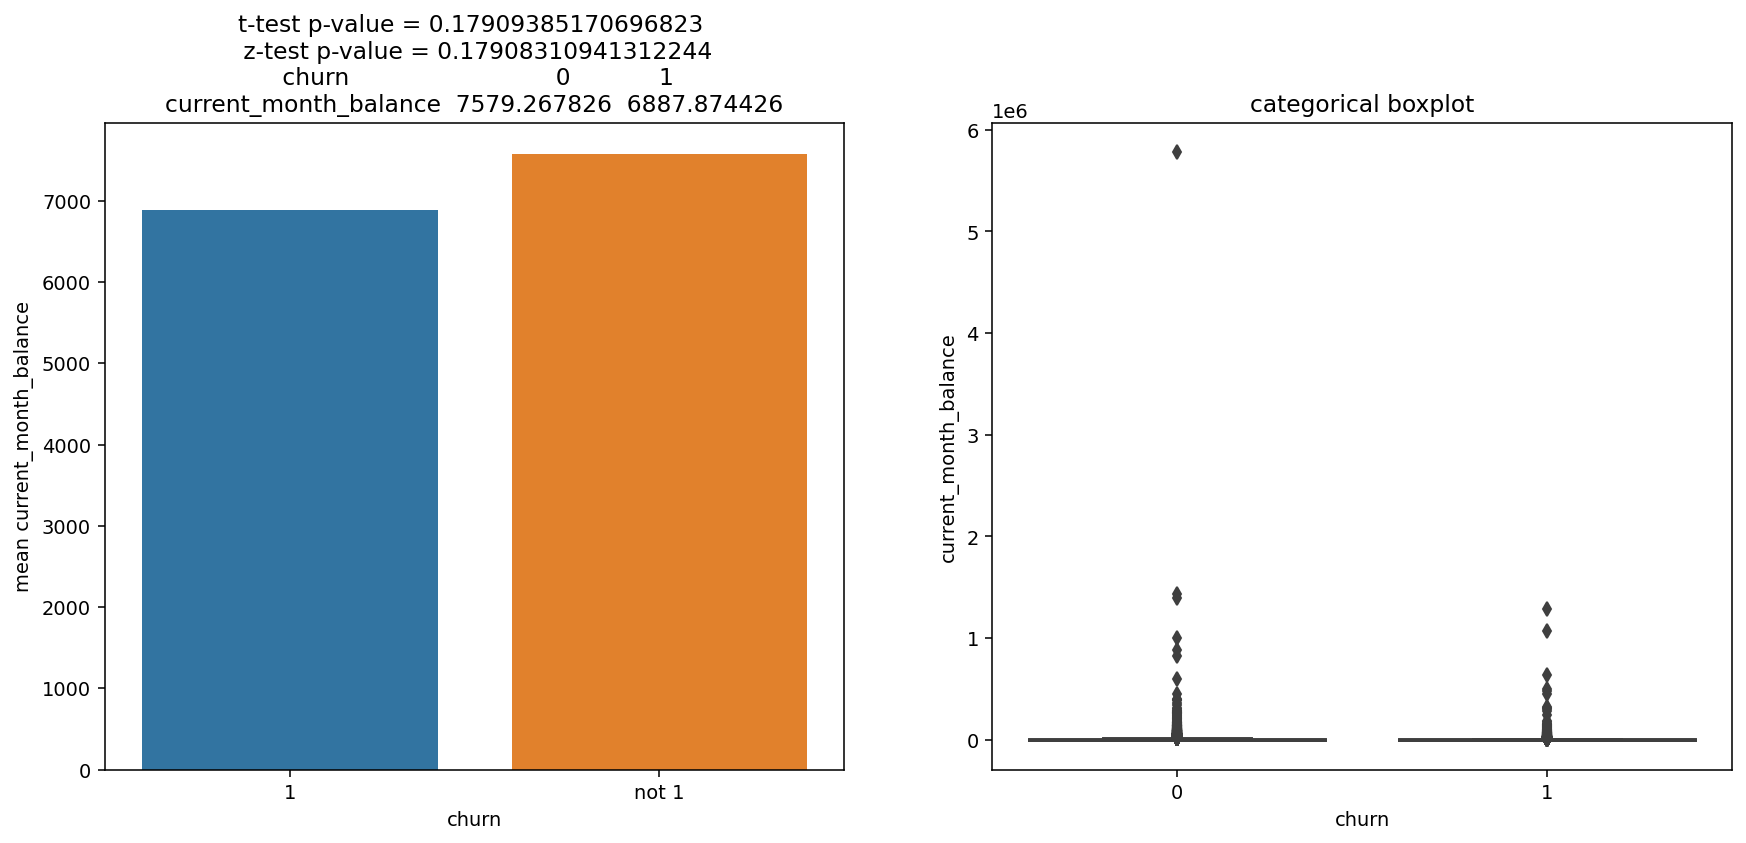

In [ ]:
Bivariate_cont_cat(data, 'current_month_balance', 'churn', 1)

**Inferences**

Customers who churned had significantly high balance throughout the previous two quarters and previous month. But their average balance reduced significantly in the current month.

### 3. Are customers dropping monthly balance highly likely to churn?

In [ ]:
# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

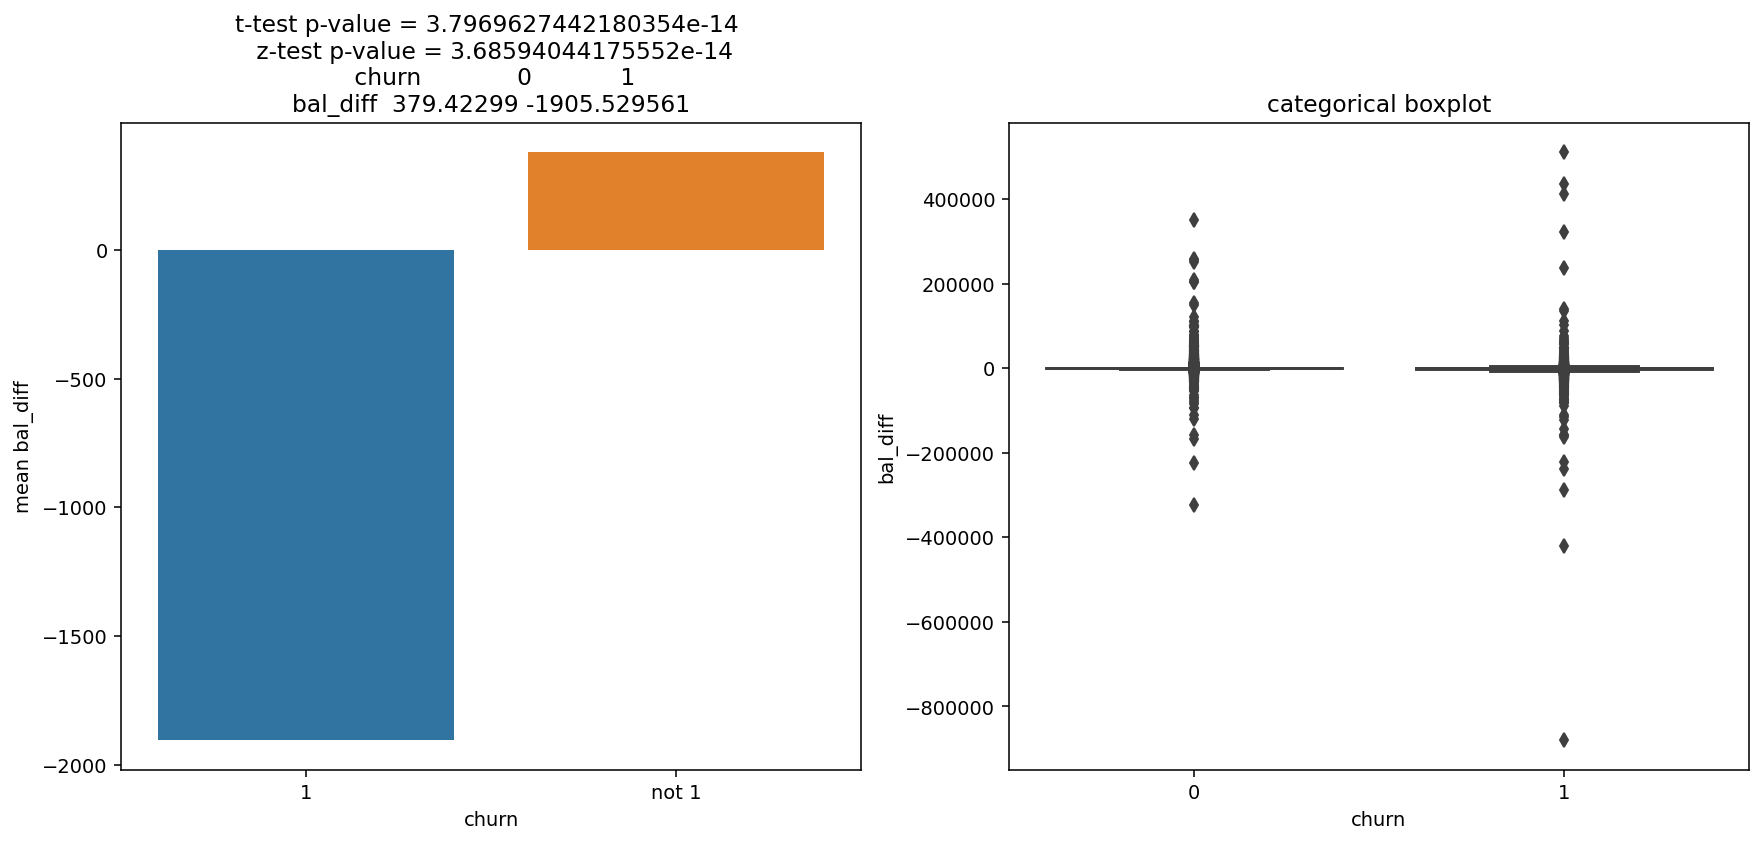

In [ ]:
Bivariate_cont_cat(difference, 'bal_diff', 'churn', 1)

**Inference**

Customers who churned had a very high drop in their balance which is signified by the negative value in this bar plot.

## **[1.11] Multi_variat_analysis**

### **[1.10.1] Pivot Table**

We are using Pivot table to comply with the objective of identifying the Churning Customers Profile using multiple categorical features.
First, Let's use Gender, Occupation and Customer Net worth category and derive insights from the Pivot Table

**[A] Gender, Occupation, Customer Net worth category with Churn**

In [ ]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='sum')

Empty DataFrame
Columns: []
Index: [(Female, company), (Female, retired), (Female, salaried), (Female, self_employed), (Female, student), (Male, company), (Male, retired), (Male, salaried), (Male, self_employed), (Male, student)]

In [ ]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

Empty DataFrame
Columns: []
Index: [(Female, company), (Female, retired), (Female, salaried), (Female, self_employed), (Female, student), (Male, company), (Male, retired), (Male, salaried), (Male, self_employed), (Male, student)]

* __Highest number of churning customers__ are those __Male Customers__ who lie in __2 net worth category__ and belong to __Self-employed__ profession
* Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
* Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
* For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning

* In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn

* This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more

**[B] Gender, Age, Occupation with Churning Status**

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

Empty DataFrame
Columns: []
Index: [(Female, (0, 25]), (Female, (25, 50]), (Female, (50, 100]), (Male, (0, 25]), (Male, (25, 50]), (Male, (50, 100])]

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

Empty DataFrame
Columns: []
Index: [(Female, (0, 25]), (Female, (25, 50]), (Female, (50, 100]), (Male, (0, 25]), (Male, (25, 50]), (Male, (50, 100])]

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories


**[C] Gender,Age,Occupation and Current Balance with Churning Status**

Let's dig deeper by using two continuous variables Age and Current Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to churning customers profile

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

Empty DataFrame
Columns: []
Index: [(Female, (0, 25]), (Female, (25, 50]), (Female, (50, 100]), (Male, (0, 25]), (Male, (25, 50]), (Male, (50, 100])]

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

Empty DataFrame
Columns: []
Index: [(Female, (0, 25]), (Female, (25, 50]), (Female, (50, 100]), (Male, (0, 25]), (Male, (25, 50]), (Male, (50, 100])]

* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

### **[1.10.2] Box Plot**

Now in order to comply with our objective of identifying churning customers profile we will use grouped Box plot.

In [ ]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


**[A] Age, Occupation, Churn**

We are using one continuous variable Age and one categorical variable Occupation to derive insights related to churning customers profile

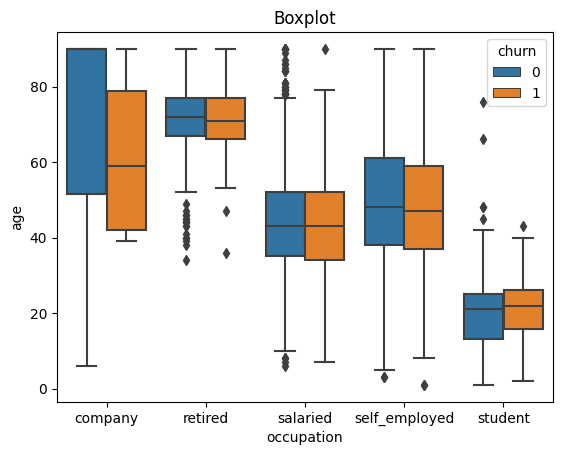

In [ ]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

We can notice here that
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__


**[B] Vintage, Gender, Churn**

It is also important to know the significance of vintage on churning profile of customers gender wise
So let't take Vintage and Gender to derive insights for churning customers

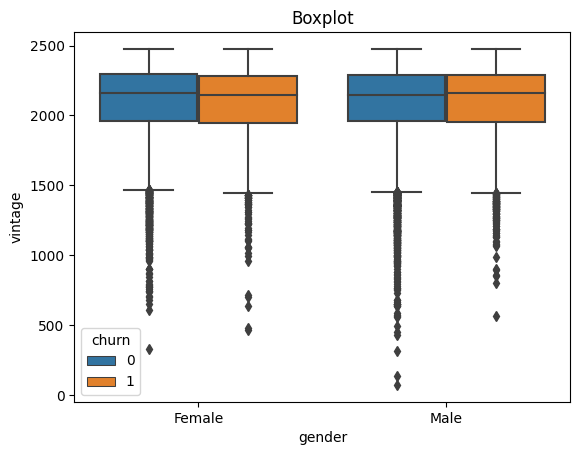

In [ ]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

* There is __no visible difference__ in the vintage feature for genderwise churning and non churning customers


### **[1.10.3] Pair Plot**

**[A] Churn vs Current & Previous month balances**

Now, we will check the relationship of the some transactional variables along with the churning status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [ ]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [ ]:
data1['churn'] = data['churn']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

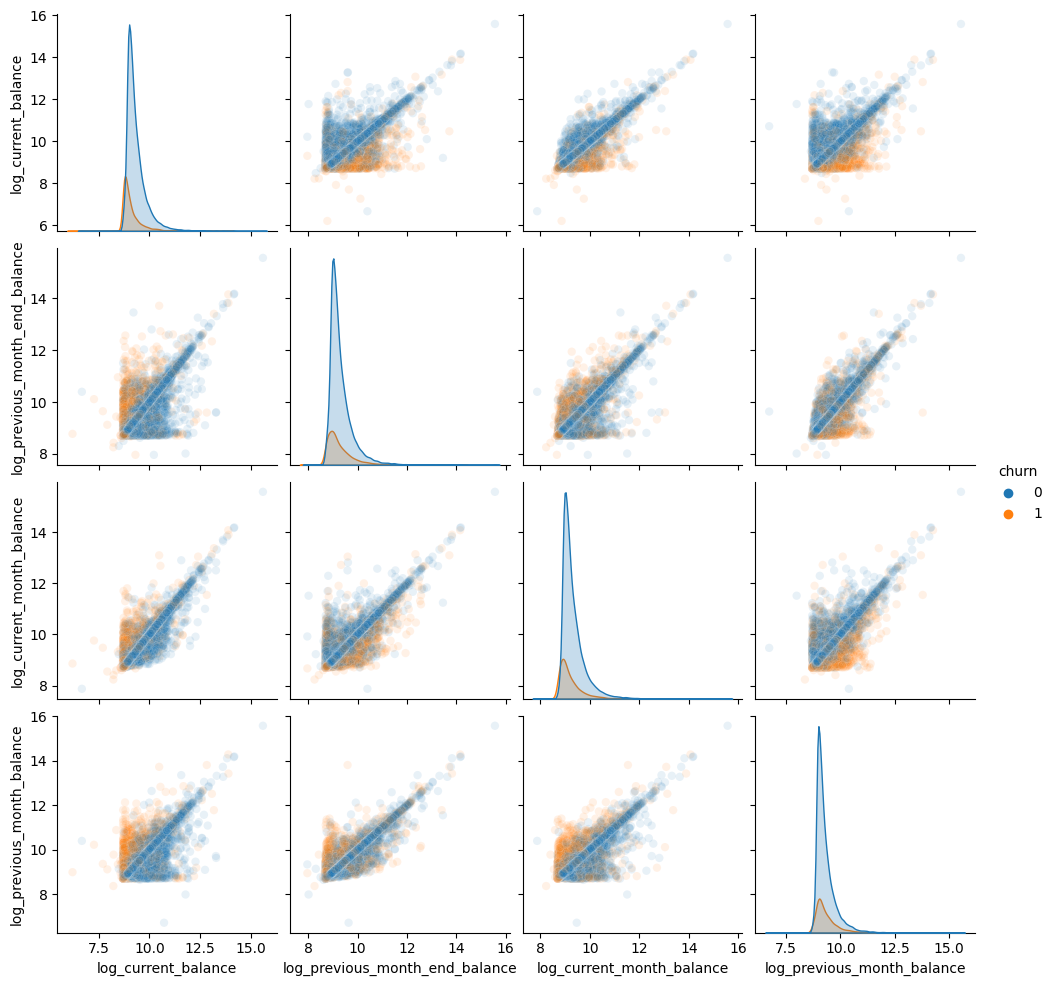

In [ ]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for churn and not churn is slightly different for both the cases

**[B] Credit and Debits for current and previous months**

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [ ]:
cr_dr_cols = ['current_month_credit','previous_month_credit',
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [ ]:
data1['churn'] = data['churn']

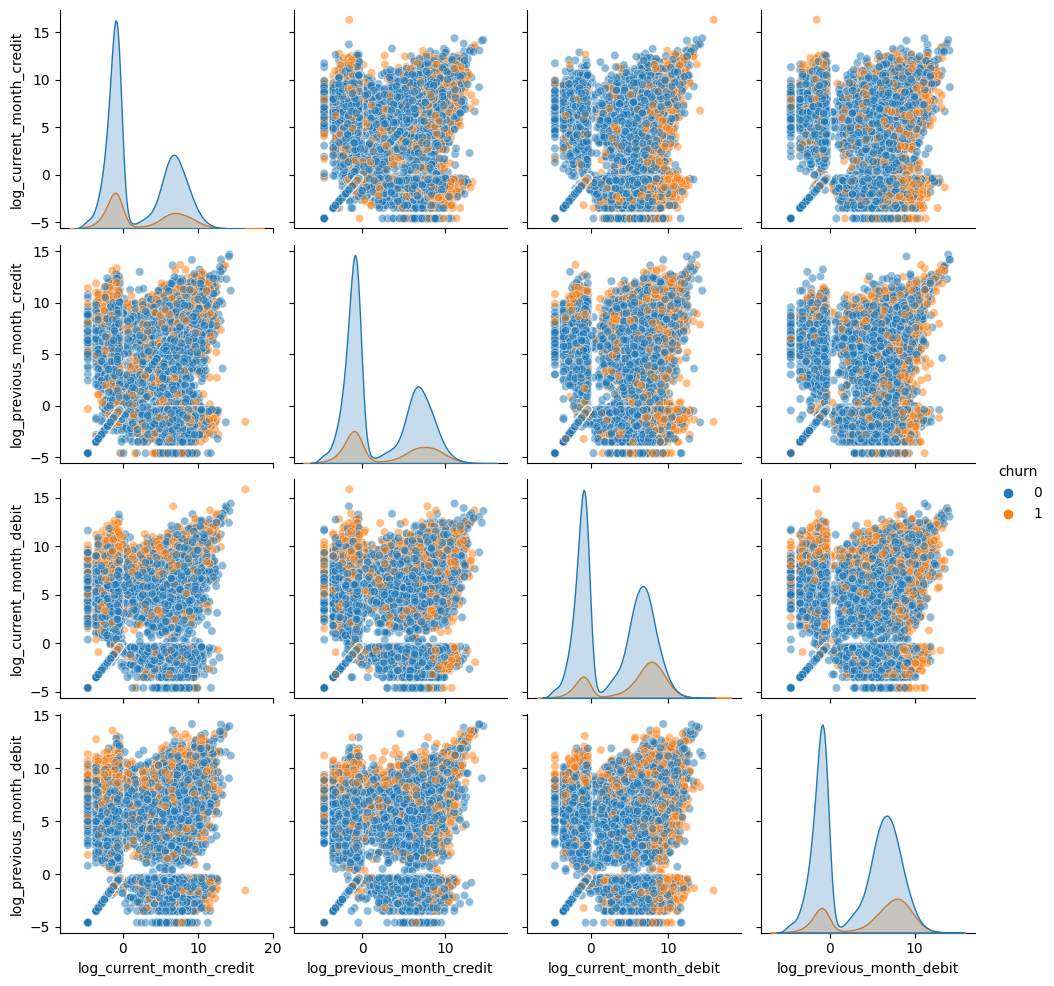

In [ ]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature

# **[2] Feature Engineering**

## **[2.1] Variable Identification and Typecasting**




In [ ]:
# A closer look at the data types present in the data
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### [2.1.1] Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [ ]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### [2.1.2] Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [ ]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

### [2.1.3] Object Data Type

In [ ]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

*    **variables like 'gender', 'occupation' and 'last_transaction' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [ ]:
# Manually checking object types
data[['gender','occupation','last_transaction']].head(7)

gender     occupation last_transaction
0    Male  self_employed       2019-05-21
1    Male  self_employed       2019-11-01
2    Male       salaried              NaT
3     NaN  self_employed       2019-08-06
4    Male  self_employed       2019-11-03
5  Female  self_employed       2019-11-01
6    Male        retired       2019-09-24

*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [ ]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [ ]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

## **[2.2] Feature generation**

###[2.2.1] Extracting new columns from "last_transaction"

In [ ]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [ ]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [ ]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

last_transaction  doy_ls_tran  woy_ls_tran  moy_ls_tran  dow_ls_tran
0       2019-05-21        141.0         21.0          5.0          1.0
1       2019-11-01        305.0         44.0         11.0          4.0
2              NaT          NaN          NaN          NaN          NaN
3       2019-08-06        218.0         32.0          8.0          1.0
4       2019-11-03        307.0         44.0         11.0          6.0

The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

## **[2.3] Missing Values**

In [ ]:
# finding number of missing values in every variable
data.isnull().mean()*100


customer_id                        0.000000
vintage                            0.000000
age                                0.000000
gender                             1.849764
dependents                         8.678035
occupation                         0.281869
city                               2.829258
customer_nw_category               0.000000
branch_code                        0.000000
current_balance                    0.000000
previous_month_end_balance         0.000000
average_monthly_balance_prevQ      0.000000
average_monthly_balance_prevQ2     0.000000
current_month_credit               0.000000
previous_month_credit              0.000000
current_month_debit                0.000000
previous_month_debit               0.000000
current_month_balance              0.000000
previous_month_balance             0.000000
churn                              0.000000
doy_ls_tran                       11.355789
woy_ls_tran                       11.355789
moy_ls_tran                     

### [2.3.1] Imputing missing values

In [ ]:
data['gender'].mode()

0    Male
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [ ]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

In [ ]:
#gender
data['gender'].fillna("Male", inplace = True)

#dependents
data['dependents'].fillna(0, inplace = True)

#occupation
data['occupation'].fillna("self_employed", inplace = True)

#ls_tran
data['doy_ls_tran'].fillna(999, inplace = True)
data['woy_ls_tran'].fillna(999, inplace = True)
data['moy_ls_tran'].fillna(999, inplace = True)
data['dow_ls_tran'].fillna(999, inplace = True)
data.head(10)

customer_id  vintage  age  gender  dependents     occupation    city  \
0            1     2101   66    Male           0  self_employed   187.0   
1            2     2348   35    Male           0  self_employed     NaN   
2            4     2194   31    Male           0       salaried   146.0   
3            5     2329   90    Male           0  self_employed  1020.0   
4            6     1579   42    Male           2  self_employed  1494.0   
5            7     1923   42  Female           0  self_employed  1096.0   
6            8     2048   72    Male           0        retired  1020.0   
7            9     2009   46    Male           0  self_employed   623.0   
8           10     2053   31    Male           0       salaried  1096.0   
9           11     2295   40    Male           3  self_employed  1020.0   

  customer_nw_category branch_code  current_balance  ...  \
0                    2         755          1458.71  ...   
1                    2        3214          5390.37  ...   
2                    2          41          3913.16  ...   
3                    2         582          2291.91  ...   
4                    3         388           927.72  ...   
5                    2        1666         15202.20  ...   
6                    1           1          7006.93  ...   
7                    2         317         10096.58  ...   
8                    2        4110          1355.86  ...   
9                    2          38          4957.95  ...   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   
5                   0.36               857.50                286.07   
6                   0.64              1299.64                439.26   
7                   0.27               443.13               5688.44   
8                 121.09               714.51                359.44   
9                4206.13              1887.30               1348.85   

   current_month_balance  previous_month_balance  churn  doy_ls_tran  \
0                1458.71                 1458.71      0        141.0   
1                6496.78                 8787.61      0        305.0   
2                5006.28                 5070.14      0        999.0   
3                2291.91                 1669.79      1        218.0   
4                1157.15                 1677.16      1        307.0   
5               15719.44                15349.75      0        305.0   
6                7076.06                 7755.98      0        267.0   
7                8563.84                 5317.04      0        193.0   
8                1183.45                 1857.42      0        346.0   
9                1823.16                 2416.69      0        365.0   

   woy_ls_tran  moy_ls_tran dow_ls_tran  
0         21.0          5.0         1.0  
1         44.0         11.0         4.0  
2        999.0        999.0       999.0  
3         32.0          8.0         1.0  
4         44.0         11.0         6.0  
5         44.0         11.0         4.0  
6         39.0          9.0         1.0  
7         28.0          7.0         4.0  
8         50.0         12.0         3.0  
9          1.0         12.0         1.0  

[10 rows x 24 columns]

In [ ]:
# finding number of missing values in every variable
data.isnull().mean()*100

customer_id                       0.000000
vintage                           0.000000
age                               0.000000
gender                            0.000000
dependents                        0.000000
occupation                        0.000000
city                              2.829258
customer_nw_category              0.000000
branch_code                       0.000000
current_balance                   0.000000
previous_month_end_balance        0.000000
average_monthly_balance_prevQ     0.000000
average_monthly_balance_prevQ2    0.000000
current_month_credit              0.000000
previous_month_credit             0.000000
current_month_debit               0.000000
previous_month_debit              0.000000
current_month_balance             0.000000
previous_month_balance            0.000000
churn                             0.000000
doy_ls_tran                       0.000000
woy_ls_tran                       0.000000
moy_ls_tran                       0.000000
dow_ls_tran

### [2.3.2] Remove missing values

In [ ]:
data.dropna(inplace=True)

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
doy_ls_tran                       0
woy_ls_tran                       0
moy_ls_tran                       0
dow_ls_tran                       0
dtype: int64

In [ ]:
data.shape

(27579, 24)

## **[2.4] Frature preprocessing**

### [2.4.1] One Hot Encoding

In [ ]:
data_encoded = pd.get_dummies(data[['occupation', 'gender']])
data_encoded.head(5)

occupation_company  occupation_retired  occupation_salaried  \
0                   0                   0                    0   
2                   0                   0                    1   
3                   0                   0                    0   
4                   0                   0                    0   
5                   0                   0                    0   

   occupation_self_employed  occupation_student  gender_Female  gender_Male  
0                         1                   0              0            1  
2                         0                   0              0            1  
3                         1                   0              0            1  
4                         1                   0              0            1  
5                         1                   0              1            0

In [ ]:
data = data.drop(columns = ['occupation', 'gender'])

In [ ]:
data = pd.concat([data, data_encoded],axis= 1)
data.head()

customer_id  vintage  age  dependents    city customer_nw_category  \
0            1     2101   66           0   187.0                    2   
2            4     2194   31           0   146.0                    2   
3            5     2329   90           0  1020.0                    2   
4            6     1579   42           2  1494.0                    3   
5            7     1923   42           0  1096.0                    2   

  branch_code  current_balance  previous_month_end_balance  \
0         755          1458.71                     1458.71   
2          41          3913.16                     5815.29   
3         582          2291.91                     2291.91   
4         388           927.72                     1401.72   
5        1666         15202.20                    16059.34   

   average_monthly_balance_prevQ  ...  woy_ls_tran  moy_ls_tran  dow_ls_tran  \
0                        1458.71  ...         21.0          5.0          1.0   
2                        4910.17  ...        999.0        999.0        999.0   
3                        2084.54  ...         32.0          8.0          1.0   
4                        1643.31  ...         44.0         11.0          6.0   
5                       15211.29  ...         44.0         11.0          4.0   

   occupation_company  occupation_retired  occupation_salaried  \
0                   0                   0                    0   
2                   0                   0                    1   
3                   0                   0                    0   
4                   0                   0                    0   
5                   0                   0                    0   

   occupation_self_employed occupation_student  gender_Female  gender_Male  
0                         1                  0              0            1  
2                         0                  0              0            1  
3                         1                  0              0            1  
4                         1                  0              0            1  
5                         1                  0              1            0  

[5 rows x 29 columns]

In [ ]:
data.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student', 'gender_Female',
       'gender_Male'],
      dtype='object')

### [2.4.2] Log Transformation

Now, we remember that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features if you recall from the EDA. We will do log transformation to deal with this.

In [ ]:
num_cols = [ 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit',
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    data[i] = np.log(data[i] + 17000)

# **[3] Dimensionality reduction**

In [ ]:
data = data.drop('customer_id',axis=1)
data.head()

vintage  age  dependents    city customer_nw_category branch_code  \
0     2101   66           0   187.0                    2         755   
2     2194   31           0   146.0                    2          41   
3     2329   90           0  1020.0                    2         582   
4     1579   42           2  1494.0                    3         388   
5     1923   42           0  1096.0                    2        1666   

   current_balance  previous_month_end_balance  average_monthly_balance_prevQ  \
0         9.823292                    9.823292                       9.823292   
2         9.948134                   10.035186                       9.994706   
3         9.867441                    9.867441                       9.856634   
4         9.794103                    9.820199                       9.833243   
5        10.379790                   10.406059                      10.380072   

   average_monthly_balance_prevQ2  ...  woy_ls_tran  moy_ls_tran  dow_ls_tran  \
0                        9.822769  ...         21.0          5.0          1.0   
2                        9.894242  ...        999.0        999.0        999.0   
3                        9.798490  ...         32.0          8.0          1.0   
4                        9.845388  ...         44.0         11.0          6.0   
5                       10.335232  ...         44.0         11.0          4.0   

   occupation_company  occupation_retired  occupation_salaried  \
0                   0                   0                    0   
2                   0                   0                    1   
3                   0                   0                    0   
4                   0                   0                    0   
5                   0                   0                    0   

  occupation_self_employed  occupation_student  gender_Female  gender_Male  
0                        1                   0              0            1  
2                        0                   0              0            1  
3                        1                   0              0            1  
4                        1                   0              0            1  
5                        1                   0              1            0  

[5 rows x 28 columns]

# **[4] Model Building**

## **[4.1] Test Train Split**


In [ ]:
# For train set
x = data.drop(['churn'], axis=1)
y = data['churn']

In [ ]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y , test_size = 1/3 , random_state = 50, stratify = y)

## **[4.2] Cross validation and train_test_score function**

Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation.

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.

Since it builds several models on different subsets of the dataset, we can be more sure of our model performance if we use CV for testing our models.

In [ ]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = x.columns):
    i = 1
    cv_scores = []
    df1 = x.copy()
    df1 = x[cols]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.iloc[df_index],df1.iloc[test_index]
        ytr,yvl = y.iloc[df_index],y.iloc[test_index]

        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []

        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))

         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [ ]:
def train_test_score(ml_model):
  model=ml_model
  model.fit(xtrain,ytrain)
  train_pred_probs = model.predict_proba(xtrain)
  train_roc_score = roc_auc_score(ytrain,train_pred_probs[:,1])

  test_pred_probs = model.predict_proba(xtest)
  test_roc_score = roc_auc_score(ytest,test_pred_probs[:,1])
  diff = train_roc_score - test_roc_score
  print(train_roc_score)
  print(test_roc_score)
  print(diff)

## **[4.3] KNN Classification**

### [4.3.1] Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

vintage       age  dependents      city  customer_nw_category  \
0  0.843945  0.730337    0.000000  0.113402                   0.5   
1  0.882647  0.337079    0.000000  0.088539                   0.5   
2  0.938826  1.000000    0.000000  0.618557                   0.5   
3  0.626717  0.460674    0.038462  0.906004                   1.0   
4  0.769871  0.460674    0.000000  0.664645                   0.5   

   branch_code  current_balance  previous_month_end_balance  \
0     0.157708         0.075831                    0.047632   
1     0.008366         0.095823                    0.082773   
2     0.121523         0.082901                    0.054954   
3     0.080945         0.071157                    0.047120   
4     0.348254         0.164948                    0.144278   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  ...  \
0                       0.000284                        0.392330  ...   
1                       0.030161                        0.400075  ...   
2                       0.006095                        0.389699  ...   
3                       0.002018                        0.394781  ...   
4                       0.097329                        0.447863  ...   

   woy_ls_tran  moy_ls_tran  dow_ls_tran  occupation_company  \
0     0.020040     0.004008     0.001001                 0.0   
1     1.000000     1.000000     1.000000                 0.0   
2     0.031062     0.007014     0.001001                 0.0   
3     0.043086     0.010020     0.006006                 0.0   
4     0.043086     0.010020     0.004004                 0.0   

   occupation_retired  occupation_salaried  occupation_self_employed  \
0                 0.0                  0.0                       1.0   
1                 0.0                  1.0                       0.0   
2                 0.0                  0.0                       1.0   
3                 0.0                  0.0                       1.0   
4                 0.0                  0.0                       1.0   

   occupation_student  gender_Female  gender_Male  
0                 0.0            0.0          1.0  
1                 0.0            0.0          1.0  
2                 0.0            0.0          1.0  
3                 0.0            0.0          1.0  
4                 0.0            1.0          0.0  

[5 rows x 27 columns]

### [4.3.2] Test Train Split for KNN

In [ ]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split
xtrain_KNN, xtest_KNN, ytrain_KNN, ytest_KNN = train_test_split(x_scaled,y,test_size=1/3, random_state=0, stratify = y)


### [4.3.3] KNN Cross validation

In [ ]:
def cv_score_KNN(ml_model, rstate = 12, thres = 0.5, cols = x_scaled.columns):
    i = 1
    cv_scores = []
    df1 = x_scaled.copy()
    df1 = x_scaled[cols]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.iloc[df_index],df1.iloc[test_index]
        ytr,yvl = y.iloc[df_index],y.iloc[test_index]

        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []

        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))

         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [ ]:
def train_test_score_KNN(ml_model):
  model=ml_model
  model.fit(xtrain_KNN,ytrain_KNN)
  train_pred_probs = model.predict_proba(xtrain_KNN)
  train_roc_score = roc_auc_score(ytrain_KNN,train_pred_probs[:,1])

  test_pred_probs = model.predict_proba(xtest_KNN)
  test_roc_score = roc_auc_score(ytest_KNN,test_pred_probs[:,1])
  diff = train_roc_score - test_roc_score
  print(train_roc_score)
  print(test_roc_score)
  print(diff)

### [4.3.4] Hyperparameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_clf = KNeighborsClassifier()

parameter_grid = {
    'n_neighbors' : [10, 20, 30, 40, 50]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=KNN_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain_KNN, ytrain_KNN)

gridsearch.best_params_

{'n_neighbors': 50}

In [ ]:
KNN_clf = KNeighborsClassifier()

parameter_grid = {
    'n_neighbors' : [50,70,100]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=KNN_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain_KNN, ytrain_KNN)

gridsearch.best_params_

{'n_neighbors': 100}

In [ ]:
KNN_clf = KNeighborsClassifier()

parameter_grid = {
    'n_neighbors' : [100,120,150,200]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=KNN_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain_KNN, ytrain_KNN)

gridsearch.best_params_

{'n_neighbors': 100}

In [ ]:
KNN_train_test_score_1 = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 10))

0.7917210656891217
0.560955258222666
0.2307658074664557


In [ ]:
KNN_train_test_score_2 = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 50))

0.6811726897704155
0.6022199749204896
0.07895271484992583


In [ ]:
KNN_train_test_score_3 = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 100))

0.6532590011581563
0.6039267356596676
0.04933226549848868


In [ ]:
KNN_train_test_score_4 = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 150))

0.6413294948299233
0.6017940505042843
0.039535444325639046


In [ ]:
KNN_train_test_score_5 = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 200))

0.6339844192403168
0.6013298376586299
0.03265458158168688


### [4.3.5] Appling model

In [ ]:
KNN_cv_scores = cv_score_KNN(KNeighborsClassifier(n_neighbors = 100))


1 of kfold 5
ROC AUC Score: 0.6113146415569162, Recall Score: 0.0000, Precision Score: 0.0000 

2 of kfold 5
ROC AUC Score: 0.6002806799779069, Recall Score: 0.0000, Precision Score: 0.0000 

3 of kfold 5
ROC AUC Score: 0.6116756288814458, Recall Score: 0.0000, Precision Score: 0.0000 

4 of kfold 5
ROC AUC Score: 0.5989565888633033, Recall Score: 0.0000, Precision Score: 0.0000 

5 of kfold 5
ROC AUC Score: 0.608520189355973, Recall Score: 0.0000, Precision Score: 0.0000 


In [ ]:
KNN_train_test_score = train_test_score_KNN(KNeighborsClassifier(n_neighbors = 100))

0.6532590011581563
0.6039267356596676
0.04933226549848868


## **[4.4] Logistic Regression**

### [4.4.1] Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

vintage       age  dependents      city  customer_nw_category  \
0  0.843945  0.730337    0.000000  0.113402                   0.5   
1  0.882647  0.337079    0.000000  0.088539                   0.5   
2  0.938826  1.000000    0.000000  0.618557                   0.5   
3  0.626717  0.460674    0.038462  0.906004                   1.0   
4  0.769871  0.460674    0.000000  0.664645                   0.5   

   branch_code  current_balance  previous_month_end_balance  \
0     0.157708         0.075831                    0.047632   
1     0.008366         0.095823                    0.082773   
2     0.121523         0.082901                    0.054954   
3     0.080945         0.071157                    0.047120   
4     0.348254         0.164948                    0.144278   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  ...  \
0                       0.000284                        0.392330  ...   
1                       0.030161                        0.400075  ...   
2                       0.006095                        0.389699  ...   
3                       0.002018                        0.394781  ...   
4                       0.097329                        0.447863  ...   

   woy_ls_tran  moy_ls_tran  dow_ls_tran  occupation_company  \
0     0.020040     0.004008     0.001001                 0.0   
1     1.000000     1.000000     1.000000                 0.0   
2     0.031062     0.007014     0.001001                 0.0   
3     0.043086     0.010020     0.006006                 0.0   
4     0.043086     0.010020     0.004004                 0.0   

   occupation_retired  occupation_salaried  occupation_self_employed  \
0                 0.0                  0.0                       1.0   
1                 0.0                  1.0                       0.0   
2                 0.0                  0.0                       1.0   
3                 0.0                  0.0                       1.0   
4                 0.0                  0.0                       1.0   

   occupation_student  gender_Female  gender_Male  
0                 0.0            0.0          1.0  
1                 0.0            0.0          1.0  
2                 0.0            0.0          1.0  
3                 0.0            0.0          1.0  
4                 0.0            1.0          0.0  

[5 rows x 27 columns]

### [4.4.2] Test Train Split for LR

In [ ]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split
xtrain_LR, xtest_LR, ytrain_LR, ytest_LR = train_test_split(x_scaled,y,test_size=1/3, random_state=0, stratify = y)


### [4.4.3] LR Cross validation

In [ ]:
def cv_score_LR(ml_model, rstate = 12, thres = 0.5, cols = x_scaled.columns):
    i = 1
    cv_scores = []
    df1 = x_scaled.copy()
    df1 = x_scaled[cols]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.iloc[df_index],df1.iloc[test_index]
        ytr,yvl = y.iloc[df_index],y.iloc[test_index]

        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []

        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))

         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [ ]:
def train_test_score_LR(ml_model):
  model=ml_model
  model.fit(xtrain_LR,ytrain_LR)
  train_pred_probs = model.predict_proba(xtrain_LR)
  train_roc_score = roc_auc_score(ytrain_LR,train_pred_probs[:,1])

  test_pred_probs = model.predict_proba(xtest_LR)
  test_roc_score = roc_auc_score(ytest_LR,test_pred_probs[:,1])
  diff = train_roc_score - test_roc_score
  print(train_roc_score)
  print(test_roc_score)
  print(diff)

### [4.4.4] Appling model

In [ ]:
LR_cv_scores = cv_score_LR(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.782081086442319, Recall Score: 0.1040, Precision Score: 0.7310 

2 of kfold 5
ROC AUC Score: 0.7774235271448002, Recall Score: 0.1060, Precision Score: 0.6279 

3 of kfold 5
ROC AUC Score: 0.7766339142418532, Recall Score: 0.1049, Precision Score: 0.6948 

4 of kfold 5
ROC AUC Score: 0.7712681424883122, Recall Score: 0.0902, Precision Score: 0.6345 

5 of kfold 5
ROC AUC Score: 0.7653404269065687, Recall Score: 0.0942, Precision Score: 0.6531 


In [ ]:
train_test_score_LR(LogisticRegression())

0.7724096287035513
0.775042714179191
-0.0026330854756396738


## **[4.5] Decision Tree Classifier**

### [4.5.1] Hyperparameter tuning

In [ ]:
DTR_clf = DecisionTreeClassifier(random_state= 3)


parameter_grid = {
    'max_depth' : [10,30,50],
    'min_samples_split' : [2,10,20,30],
    'min_samples_leaf' : [1,10,20,30],
    'max_features': [10,30,50],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 10,
 'max_features': 30,
 'min_samples_leaf': 30,
 'min_samples_split': 2}

In [ ]:
DTR_clf = DecisionTreeClassifier(random_state= 3)


parameter_grid = {
    'max_depth' : [5,10,20],
    'min_samples_split' : [2],
    'min_samples_leaf' : [30],
    'max_features': [25,30,35],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 10,
 'max_features': 25,
 'min_samples_leaf': 30,
 'min_samples_split': 2}

In [ ]:
DTR_clf = DecisionTreeClassifier(random_state= 3)


parameter_grid = {
    'max_depth' : [10],
    'min_samples_split' : [2],
    'min_samples_leaf' : [30],
    'max_features': [15,20,25],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 30,
 'min_samples_split': 2}

In [ ]:
DT_train_test_score_1 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 10, max_features = 20, min_samples_leaf = 30, min_samples_split = 2))

0.8582991564921548
0.7882338831630343
0.07006527332912049


In [ ]:
DT_train_test_score_2 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 10, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))

0.8572488459671014
0.7898936767620885
0.06735516920501283


In [ ]:
DT_train_test_score_3 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 10, max_features = 10, min_samples_leaf = 20, min_samples_split = 5))

0.8594175615163506
0.7925150008176052
0.06690256069874545


In [ ]:
DT_train_test_score_4 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 7, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))

0.82692196527479
0.7970897023681334
0.029832262906656637


In [ ]:
DT_train_test_score_5 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))

0.8126621956776723
0.8019136910470107
0.01074850463066157


In [ ]:
DT_train_test_score_6 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 15, min_samples_split = 10))

0.8126169564256468
0.7972986197472791
0.015318336678367683


In [ ]:
DT_train_test_score_7 = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 5, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))

0.7968558680572081
0.7822432558564019
0.01461261220080623


### [4.5.2] Appling model

In [ ]:
DT_cv_scores = cv_score(DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))


1 of kfold 5
ROC AUC Score: 0.8000425755432201, Recall Score: 0.4151, Precision Score: 0.6768 

2 of kfold 5
ROC AUC Score: 0.7960236493940023, Recall Score: 0.3935, Precision Score: 0.6785 

3 of kfold 5
ROC AUC Score: 0.8073153260414486, Recall Score: 0.4167, Precision Score: 0.6990 

4 of kfold 5
ROC AUC Score: 0.790597960714535, Recall Score: 0.4196, Precision Score: 0.6687 

5 of kfold 5
ROC AUC Score: 0.7907025195659692, Recall Score: 0.4082, Precision Score: 0.6922 


In [ ]:
DT_train_test_score = train_test_score(DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 20, min_samples_split = 5))

0.8126621956776723
0.8019136910470107
0.01074850463066157


## **[4.6] Support Vector Classification**

### [4.6.1] Hyperparameter tuning

In [ ]:
SVC_clf = SVC(random_state= 3)


parameter_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=SVC_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'kernel': 'linear'}

In [ ]:
SVC_clf = SVC(random_state= 3,kernel = 'linear')


parameter_grid = {
    'C' : [0.01, 1],
    'gamma': [0.01, 1]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=SVC_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'C': 0.01, 'gamma': 0.01}

In [ ]:
SVC_train_test_score_1 = train_test_score(SVC(random_state= 3,kernel = 'linear', gamma = 0.01, C = 0.01, probability=True))

0.6973838831708883
0.6976806086815696
-0.00029672551068127273


### [4.6.2] Appling model

In [ ]:
SVC_cv_scores = cv_score(SVC(random_state= 3,kernel = 'linear', gamma = 0.01, C = 0.01, probability=True))


1 of kfold 5
ROC AUC Score: 0.7008316306389408, Recall Score: 0.0638, Precision Score: 0.5752 

2 of kfold 5
ROC AUC Score: 0.702208188950741, Recall Score: 0.0795, Precision Score: 0.5786 

3 of kfold 5
ROC AUC Score: 0.6914573302630661, Recall Score: 0.0755, Precision Score: 0.5704 

4 of kfold 5
ROC AUC Score: 0.7002266720745238, Recall Score: 0.0667, Precision Score: 0.5574 

5 of kfold 5
ROC AUC Score: 0.6776323256699227, Recall Score: 0.0628, Precision Score: 0.5714 


In [ ]:
SVC_train_test_score = train_test_score(SVC(random_state= 3,kernel = 'linear', gamma = 0.01, C = 0.01, probability=True))

0.6973838831708883
0.6976806086815696
-0.00029672551068127273


## **[4.7] Random Forest Classifier**

### [4.7.1] Hyperparameter tuning

In [ ]:
RF_clf = RandomForestClassifier(random_state=7)


parameter_grid = {
    'n_estimators' : [10,70],
    'max_depth' : [10,70],
    'min_samples_split' : [2,10],
    'min_samples_leaf' : [1,10],
    'max_features': [1,10],
    'n_jobs' : [1,-1]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator= RF_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 70,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 70,
 'n_jobs': 1}

In [ ]:
RF_clf = RandomForestClassifier(random_state= 3,min_samples_split = 2,n_jobs = 1)


parameter_grid = {
    'n_estimators' : [70,100],
    'max_depth' : [70,100],
    'min_samples_leaf' : [10,50],
    'max_features': [10,50],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator= RF_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 70,
 'max_features': 10,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [ ]:
RF_clf = RandomForestClassifier(n_estimators = 70 ,random_state= 3, min_samples_leaf = 10, max_features = 10,min_samples_split = 2,n_jobs = 1)


parameter_grid = {
    'max_depth' : [20,30,40,50,70],
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator= RF_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 30}

In [ ]:
RF_train_test_score_1 = train_test_score(RandomForestClassifier(n_estimators = 100 ,random_state= 3,max_depth =30, min_samples_leaf = 10, max_features = 10,min_samples_split = 2,n_jobs = 1))

0.9607399083873732
0.8368301076018752
0.12390980078549807


In [ ]:
RF_train_test_score_2 = train_test_score(RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =10, min_samples_leaf = 10, max_features = 10,min_samples_split = 2,n_jobs = 1))

0.8906258713072086
0.8347928097235491
0.05583306158365953


In [ ]:
RF_train_test_score_3 = train_test_score(RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =6, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1))

0.8422720911671459
0.8234487138464941
0.018823377320651757


### [4.7.2] Appling model

In [ ]:
RF_cv_scores = cv_score(RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =6, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1))


1 of kfold 5
ROC AUC Score: 0.825591611286818, Recall Score: 0.3229, Precision Score: 0.7091 

2 of kfold 5
ROC AUC Score: 0.8272734652673258, Recall Score: 0.3288, Precision Score: 0.7158 

3 of kfold 5
ROC AUC Score: 0.8306145767915707, Recall Score: 0.3343, Precision Score: 0.7698 

4 of kfold 5
ROC AUC Score: 0.8155333062940479, Recall Score: 0.3363, Precision Score: 0.7236 

5 of kfold 5
ROC AUC Score: 0.8193091274677918, Recall Score: 0.3611, Precision Score: 0.7375 


In [ ]:
RF_train_test_score = train_test_score(RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =6, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1))

0.8422720911671459
0.8234487138464941
0.018823377320651757


## **[4.8] XGBoost**

### [4.8.1] Hyperparameter tuning

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=7, objective='binary:logistic',enable_categorical = True)


parameter_grid = {
    "learning_rate" : [0.05,0.1],
    "min_child_weight" : [5,10],
    "subsample" : [0.7,0.1],
    "colsample_bytree" : [0.7,0.1],
    'colsample_bylevel' : [0.7,1.0],
    "reg_alpha" : [0.5,1],
    "reg_lambda" : [0.5,1],
    'gamma' : [0.5,1],
    'n_estimators' : [50,100],
    'max_depth' : [5,10]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator= xgb_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 0.7,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 100,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.7}

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators = 100, max_depth = 5,random_state=7, objective='binary:logistic',enable_categorical = True,colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10)


parameter_grid = {
    "subsample" : [0.5,0.7],
    "colsample_bytree" : [0.7,1],
    "reg_alpha" : [0.1,0.5],
    "reg_lambda" : [0.1,0.5],
    'gamma' : [1,5]
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator= xgb_clf, param_grid=parameter_grid, scoring='roc_auc', cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'colsample_bytree': 0.7,
 'gamma': 1,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.7}

In [ ]:
xgb_train_test_score_1 = train_test_score(xgb.XGBClassifier(n_estimators = 100, max_depth = 5,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 1, reg_alpha = 0.5, reg_lambda = 0.5))

0.8780903180460791
0.8377969395331843
0.04029337851289472


In [ ]:
xgb_train_test_score_2 = train_test_score(xgb.XGBClassifier(n_estimators = 100, max_depth = 5,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 2, reg_alpha = 0.5, reg_lambda = 0.5))

0.8779558078481621
0.8381505282703698
0.03980527957779223


In [ ]:
xgb_train_test_score_3 = train_test_score(xgb.XGBClassifier(n_estimators = 100, max_depth = 5,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 2, reg_alpha = 1, reg_lambda = 1))

0.8763394667077591
0.837959518095151
0.03837994861260807


In [ ]:
xgb_train_test_score_4 = train_test_score(xgb.XGBClassifier(n_estimators = 70, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 1, reg_alpha = 3, reg_lambda = 3))

0.8270524208262039
0.8168498306591123
0.010202590167091574


### [4.8.2] early_stopping method to find right value of n_estimator

To find the approximate number of rounds for XGBoost, we will first create a validation set and check performance after each round.


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(xtrain, label=ytrain, enable_categorical = True)
dvalid = xgb.DMatrix(xtest, label=ytest, enable_categorical = True)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
xgb_params_1 = {}
xgb_params_1["objective"] = "binary:logistic"
xgb_params_1['enable_categorical'] = True
xgb_params_1['learning_rate'] = 0.05
xgb_params_1["min_child_weight"] = 10
xgb_params_1["subsample"] = 0.7
xgb_params_1["colsample_bytree"] = 0.7
xgb_params_1["colsample_bylevel"] = 1
xgb_params_1["max_depth"] = 2
xgb_params_1["random_state"] = 7
xgb_params_1["reg_lambda"] = 3
xgb_params_1["reg_alpha"] = 3
xgb_params_1["gamma"] = 1

xgb_model_1 = xgb.train(xgb_params_1, dtrain,10000, watchlist, early_stopping_rounds=50,
          maximize=False, verbose_eval = 20 )
print('Modeling RMSE %.5f' % xgb_model_1.best_score)

[0]	train-logloss:0.47311	valid-logloss:0.47327
[20]	train-logloss:0.39576	valid-logloss:0.39864
[40]	train-logloss:0.37521	valid-logloss:0.37967
[60]	train-logloss:0.36357	valid-logloss:0.36985
[80]	train-logloss:0.35547	valid-logloss:0.36284
[100]	train-logloss:0.35026	valid-logloss:0.35852
[120]	train-logloss:0.34651	valid-logloss:0.35553
[140]	train-logloss:0.34362	valid-logloss:0.35363
[160]	train-logloss:0.34124	valid-logloss:0.35208
[180]	train-logloss:0.33914	valid-logloss:0.35081
[200]	train-logloss:0.33718	valid-logloss:0.34947
[220]	train-logloss:0.33596	valid-logloss:0.34909
[240]	train-logloss:0.33463	valid-logloss:0.34840
[260]	train-logloss:0.33318	valid-logloss:0.34752
[280]	train-logloss:0.33199	valid-logloss:0.34686
[300]	train-logloss:0.33093	valid-logloss:0.34618
[320]	train-logloss:0.32988	valid-logloss:0.34581
[340]	train-logloss:0.32886	valid-logloss:0.34530
[360]	train-logloss:0.32804	valid-logloss:0.34505
[380]	train-logloss:0.32717	valid-logloss:0.34476
[400]	

In [ ]:
xgb_model_1.best_iteration

696

Now, we can investigate the importance of each feature, to understand what affects the trip duration the most significantly

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

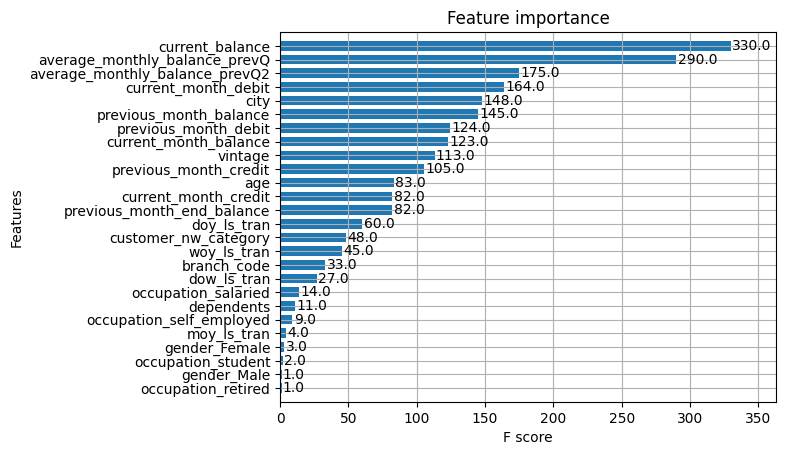

In [ ]:
xgb.plot_importance(xgb_model_1, max_num_features=28, height=0.7)

After that we will fit the XGBoost Regressor using the number of rounds identified from the above step and check the cross validation scores

In [ ]:
xgb_params_1['num_round'] = xgb_model_1.best_iteration
xgb_model_final_1 = xgb.XGBClassifier(**xgb_params_1)
xgb_scores_1 = cv_score(xgb_model_final_1)


1 of kfold 5
ROC AUC Score: 0.83656839812301, Recall Score: 0.3454, Precision Score: 0.7379 

2 of kfold 5
ROC AUC Score: 0.8276372450241061, Recall Score: 0.3523, Precision Score: 0.7081 

3 of kfold 5
ROC AUC Score: 0.8315918070965042, Recall Score: 0.3569, Precision Score: 0.7583 

4 of kfold 5
ROC AUC Score: 0.8147380460191194, Recall Score: 0.3539, Precision Score: 0.7206 

5 of kfold 5
ROC AUC Score: 0.82478078868055, Recall Score: 0.3896, Precision Score: 0.7271 


In [ ]:
xgb_train_test_score_5 = train_test_score(xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 1, reg_alpha = 3, reg_lambda = 3))

0.8662679702325723
0.836569746281624
0.029698223950948344


In [ ]:
xgb_train_test_score_6 = train_test_score(xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5))

0.8527164482223408
0.8328803124901334
0.01983613573220744


### [4.8.3] Appling model

In [ ]:
import xgboost as xgb

In [ ]:
xgb_cv_scores = cv_score(xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5))


1 of kfold 5
ROC AUC Score: 0.8489004664106024, Recall Score: 0.4171, Precision Score: 0.7290 

2 of kfold 5
ROC AUC Score: 0.8383964623236994, Recall Score: 0.4249, Precision Score: 0.7029 

3 of kfold 5
ROC AUC Score: 0.8435642139418045, Recall Score: 0.4461, Precision Score: 0.7660 

4 of kfold 5
ROC AUC Score: 0.828274588305073, Recall Score: 0.4235, Precision Score: 0.7117 

5 of kfold 5
ROC AUC Score: 0.8354439580357548, Recall Score: 0.4396, Precision Score: 0.7226 


In [ ]:

xgb_train_test_score = train_test_score(xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5))

0.8527164482223408
0.8328803124901334
0.01983613573220744


## **[4.9] Stacking**

### [4.9.1] Hyperparameter tuning

In [ ]:
# Model Definitions for feeding into Stacking
rf_clf_1 = RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =6, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1)
xgb_clf_1 = xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5)
DT_1 = DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 20, min_samples_split = 5)



from mlxtend.classifier import StackingCVClassifier
stacked_clf_1 = StackingCVClassifier(classifiers=[rf_clf_1, xgb_clf_1],
                            meta_classifier = DT_1, random_state= 7)


stacking_train_test_score_1 = train_test_score(stacked_clf_1)


0.7168663123553581
0.7104576343044222
0.006408678050935923


In [ ]:
# Model Definitions for feeding into Stacking
rf_clf_2 = RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =10, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1)
xgb_clf_2 = xgb.XGBClassifier(n_estimators = 70, max_depth = 2,random_state=10, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5)
DT_2 = DecisionTreeClassifier(random_state= 3, max_depth = 10, max_features = 20, min_samples_leaf = 20, min_samples_split = 5)


from mlxtend.classifier import StackingCVClassifier
stacked_clf_2 = StackingCVClassifier(classifiers=[rf_clf_2, xgb_clf_2],
                            meta_classifier = DT_2,
                            random_state= 7)

stacking_train_test_score_2 = train_test_score(stacked_clf_2)

0.7173496006929145
0.691301324363395
0.02604827632951956


In [ ]:
# Model Definitions for feeding into Stacking
rf_clf_3 = RandomForestClassifier(n_estimators = 50 ,random_state= 3,max_depth =7, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1)
xgb_clf_3 = xgb.XGBClassifier(n_estimators = 50, max_depth = 7,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5)
DT_3 = DecisionTreeClassifier(random_state= 3, max_depth = 7, max_features = 20, min_samples_leaf = 20, min_samples_split = 5)


from mlxtend.classifier import StackingCVClassifier
stacked_clf_3 = StackingCVClassifier(classifiers=[rf_clf_3, xgb_clf_3],
                            meta_classifier = DT_3,
                            random_state= 7)

stacking_train_test_score_3 = train_test_score(stacked_clf_3)

0.7102250271867484
0.7013104696038565
0.008914557582891947


In [ ]:
# Model Definitions for feeding into Stacking
rf_clf_4 = RandomForestClassifier(random_state= 3)
xgb_clf_4 = xgb.XGBClassifier(random_state=7, objective='binary:logistic',enable_categorical = True)
DT_4 = DecisionTreeClassifier(random_state= 3)


from mlxtend.classifier import StackingCVClassifier
stacked_clf_4 = StackingCVClassifier(classifiers=[rf_clf_4, xgb_clf_4],
                            meta_classifier = DT_4,
                            random_state= 7)

stacking_train_test_score_4 = train_test_score(stacked_clf_4)

0.9998522262974201
0.7375270826824301
0.26232514361499004


### [4.9.2] Appling model

In [ ]:
# Model Definitions for feeding into Stacking
rf_clf = RandomForestClassifier(n_estimators = 70 ,random_state= 3,max_depth =6, min_samples_leaf = 10, max_features = 5,min_samples_split = 2,n_jobs = 1)
xgb_clf = xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5)
DT = DecisionTreeClassifier(random_state= 3, max_depth = 6, max_features = 20, min_samples_leaf = 20, min_samples_split = 5)



from mlxtend.classifier import StackingCVClassifier
stacked_clf = StackingCVClassifier(classifiers=[rf_clf, xgb_clf],
                            meta_classifier = DT, random_state= 7)


stacking_cv_scores = cv_score(stacked_clf)



1 of kfold 5
ROC AUC Score: 0.6985519514372573, Recall Score: 0.4357, Precision Score: 0.7059 

2 of kfold 5
ROC AUC Score: 0.7008855320186198, Recall Score: 0.4436, Precision Score: 0.6986 

3 of kfold 5
ROC AUC Score: 0.7129796202288744, Recall Score: 0.4578, Precision Score: 0.7472 

4 of kfold 5
ROC AUC Score: 0.7023158929942084, Recall Score: 0.4451, Precision Score: 0.7017 

5 of kfold 5
ROC AUC Score: 0.7086732203786421, Recall Score: 0.4563, Precision Score: 0.7110 


In [ ]:
stacking_train_test_score = train_test_score(stacked_clf)

0.7168663123553581
0.7104576343044222
0.006408678050935923


## **[4.10] XGBoost with Feature Elimination or Backward Selection**

We have already built a model using all the features and a separate model using some baseline features. We can try using backward feature elimination to check if we can do better. Let's do that next.

In [ ]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
model = xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=1, colsample_bynode=None,
                            colsample_bytree=0.7, device=None,
                            early_stopping_rounds=None, enable_categorical=True,
                            eval_metric=None, feature_types=None, gamma=5,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=0.05,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=2, max_leaves=None, min_child_weight=10,
                            missing=nan, monotone_constraints=None,
                            multi_strategy=None, n_estimators=696, n_jobs=None,
                            num_parallel_tree=None, random_state=7, ...),
    n_features_to_select=1)

In [ ]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [ ]:
ranked = ranking_df.sort_values(by=['Rank'])

In [ ]:
ranked

Feature_name  Rank
6                  current_balance     1
12             current_month_debit     2
14           current_month_balance     3
13            previous_month_debit     4
8    average_monthly_balance_prevQ     5
15          previous_month_balance     6
9   average_monthly_balance_prevQ2     7
7       previous_month_end_balance     8
10            current_month_credit     9
16                     doy_ls_tran    10
22             occupation_salaried    11
5                      branch_code    12
11           previous_month_credit    13
4             customer_nw_category    14
23        occupation_self_employed    15
1                              age    16
0                          vintage    17
3                             city    18
17                     woy_ls_tran    19
19                     dow_ls_tran    20
25                   gender_Female    21
18                     moy_ls_tran    22
24              occupation_student    23
2                       dependents    24
20              occupation_company    25
21              occupation_retired    26
26                     gender_Male    27

The balance features are proving to be very important as can be seen from the table. The RFE function can also be used to select features. Lets select the top 10 features from this table and check score.

In [ ]:
rfe_top_10_cv_scores = cv_score(xgb.XGBClassifier(n_estimators = 696, max_depth = 2,random_state=7, objective='binary:logistic',enable_categorical = True,
                                                            colsample_bylevel = 1,learning_rate = 0.05, min_child_weight = 10, subsample = 0.7,colsample_bytree = 0.7, gamma = 5, reg_alpha = 5, reg_lambda = 5), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.8470674921652054, Recall Score: 0.4014, Precision Score: 0.7265 

2 of kfold 5
ROC AUC Score: 0.8366567789277466, Recall Score: 0.4259, Precision Score: 0.7045 

3 of kfold 5
ROC AUC Score: 0.8430698747470519, Recall Score: 0.4520, Precision Score: 0.7761 

4 of kfold 5
ROC AUC Score: 0.8279391049124276, Recall Score: 0.4216, Precision Score: 0.6981 

5 of kfold 5
ROC AUC Score: 0.8317329939337638, Recall Score: 0.4446, Precision Score: 0.7225 


# **[5] Comparison of Different model fold wise**

In [ ]:
results_df = pd.DataFrame({'KNN Classification':KNN_cv_scores, 'Logistic Regression': LR_cv_scores, 'Decision Tree Classifier': DT_cv_scores, 'Support Vector Machine': SVC_cv_scores, 'Random Forest Classifier':RF_cv_scores, 'XGBoost': xgb_cv_scores, 'Stacking': stacking_cv_scores,  'XGBoost with RFE': rfe_top_10_cv_scores})

<Axes: >

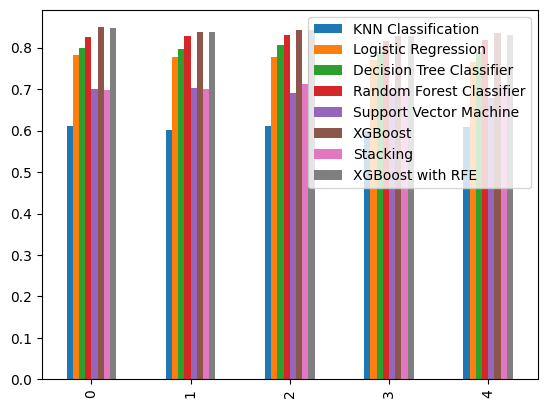

In [ ]:
results_df.plot(y=["KNN Classification", "Logistic Regression", "Decision Tree Classifier",'Random Forest Classifier', 'Support Vector Machine','XGBoost','Stacking','XGBoost with RFE'], kind="bar")

<Axes: >

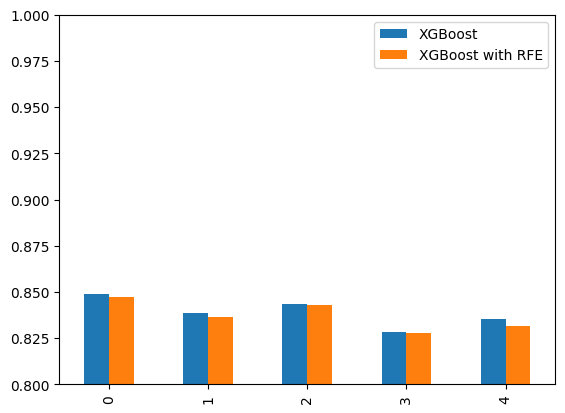

In [ ]:
results_df.plot(y=['XGBoost','XGBoost with RFE'], kind="bar", ylim=(0.8, 1))